# Statistics using SAS

* proc freq
* proc means 
* proc corr
* proc sgplot 
* proc sgscatter 
* proc anova
* proc univariate 
* proc ttest
* proc reg
* proc glm
* proc glmselect
* proc plm
* ods graphics on/off

        PROC REG < options > ;
        < label: > MODEL dependents=<regressors></ options > ;
        BY variables ;
        FREQ variable ;
        ID variables ;
        VAR variables ;
        WEIGHT variable ;
        ADD variables ;
        DELETE variables ;
        < label: > MTEST <equation, : : : ,equation> </ options > ;
        OUTPUT < OUT=SAS-data-set > keyword=names
        < : : : keyword=names > ;
        PAINT <condition j ALLOBS>
        < / options > j < STATUS | UNDO> ;
        PLOT <yvariable*xvariable> <=symbol>
        < : : :yvariable*xvariable> <=symbol> </ options > ;
        PRINT < options > < ANOVA > < MODELDATA > ;
        REFIT;
        RESTRICT equation, : : : ,equation ;
        REWEIGHT <condition j ALLOBS>
        < / options > j < STATUS | UNDO> ;
        < label: > TEST equation,<; : : :,equation> </ option > ;

In [1]:
%let path=/folders/myfolders/ECST131;
libname statdata "&path";

### Proc Corr

Standard error for correlation: 

$$St_{\rho} = \sqrt{\frac{1-r^{2}}{n-2}}$$

The NOSIMPLE option tells the procedure
that you do not want the default output of means and standard deviations for each of the
variables in the VAR and WITH lists. The RANK option says to order the correlations
from largest to smallest (by their absolute values). 

Two types of plots are available when you use ODS Graphics with PROC CORR, a panel
or matrix of scatter plots (as the one above) or individual scatter plots. 

The ONLY option says that you want only separate bivariate plots for each variable pair,
rather than the scatter plot matrix that is produced by default. By default, the maximum
number of individual plots is also set at five. 

You can use the same NVAR= option to request additional scatter plots as you used with the matrix plot.

The RANK option says to order the correlations
from largest to smallest (by their absolute values).

In [2]:
proc print data=statdata.fitness;
run;


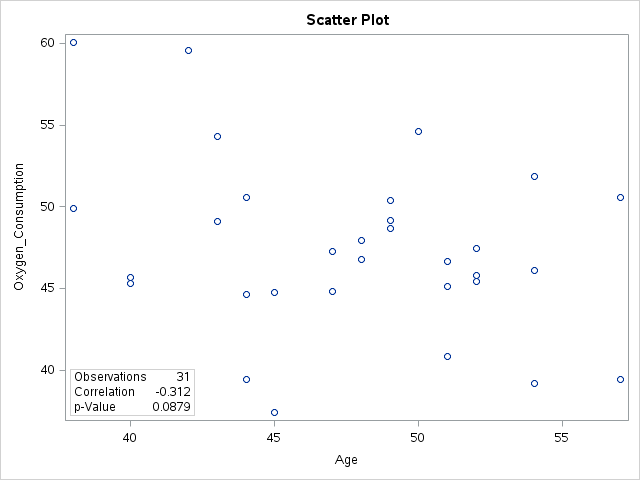
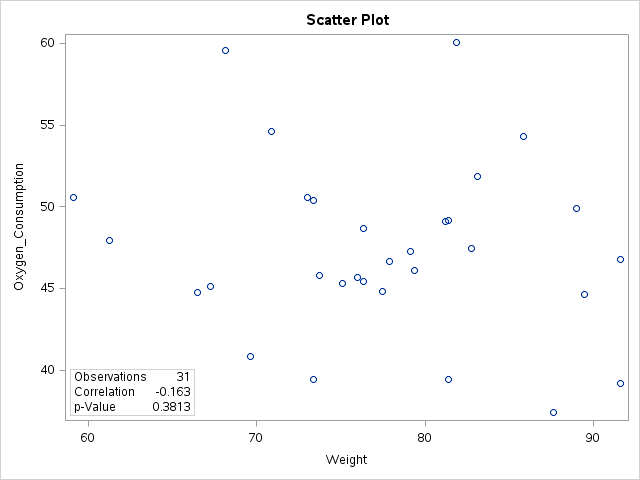
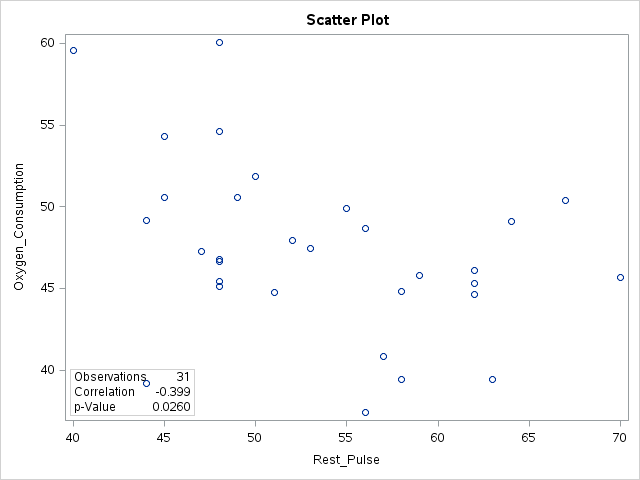
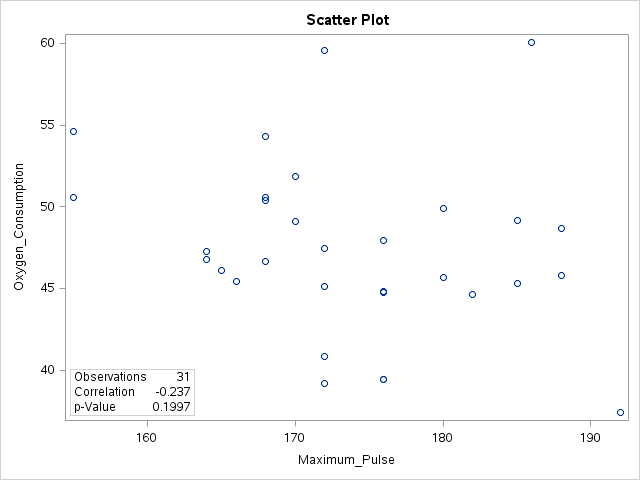

In [3]:
proc corr data=statdata.fitness rank pearson spearman
     plots(only)=scatter(nvar=all ellipse=none);
   var RunTime Age Weight Run_Pulse
       Rest_Pulse Maximum_Pulse Performance;
   with Oxygen_Consumption;
   title "Correlations and Scatter Plots with Oxygen_Consumption";
run;
title;

IMAGEMAP=ON option after a slash in the ODS GRAPHICS statement enables the tooltip feature. 


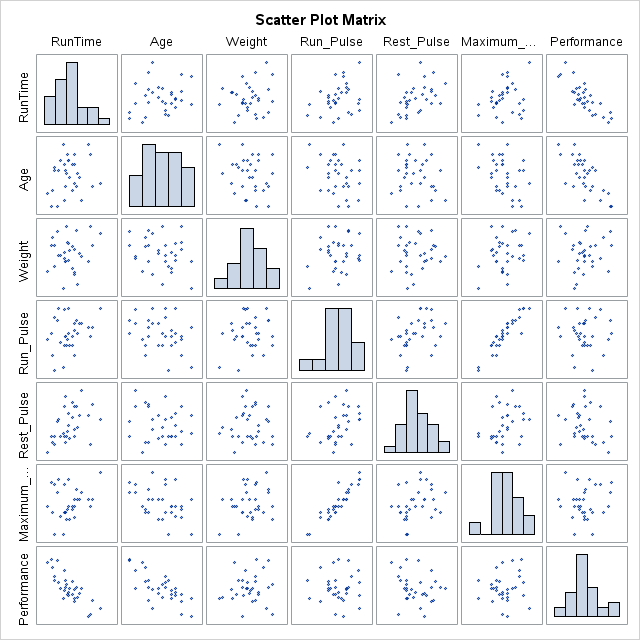

In [4]:
ods graphics on / imagemap=on;
proc corr data=statdata.fitness 
     plots=matrix(nvar=all histogram); 
   var RunTime Age Weight Run_Pulse
       Rest_Pulse Maximum_Pulse Performance;
   id name;
   title "Correlation Matrix and Scatter Plot Matrix of Fitness Predictors";
run;
title;


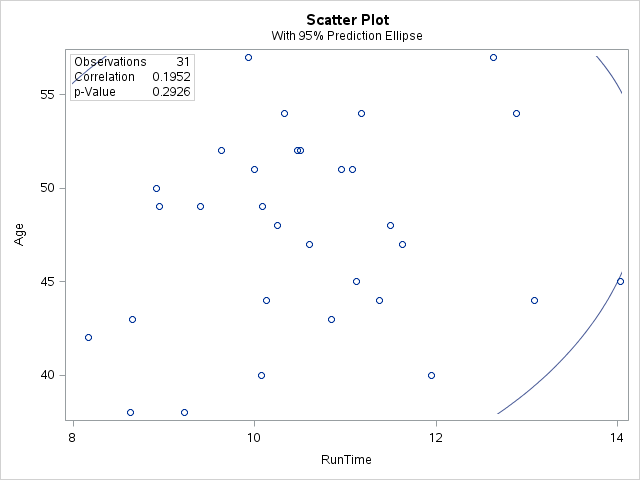
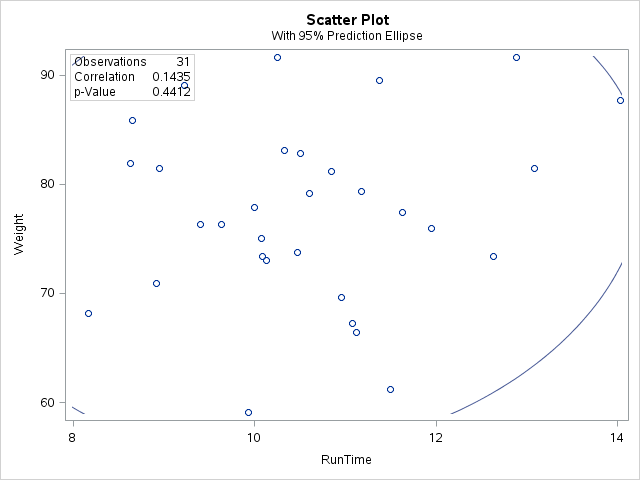
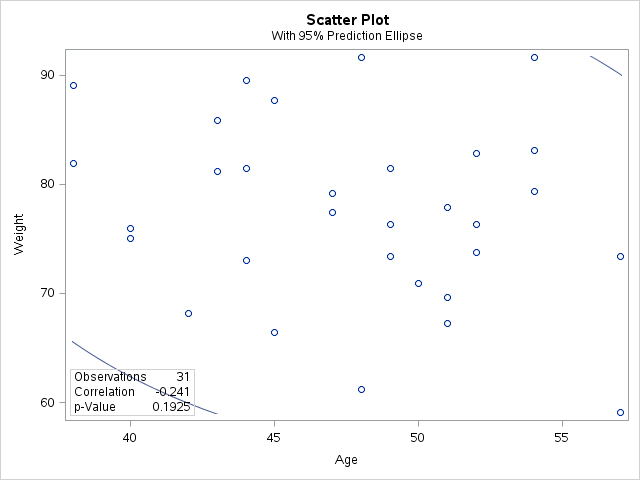
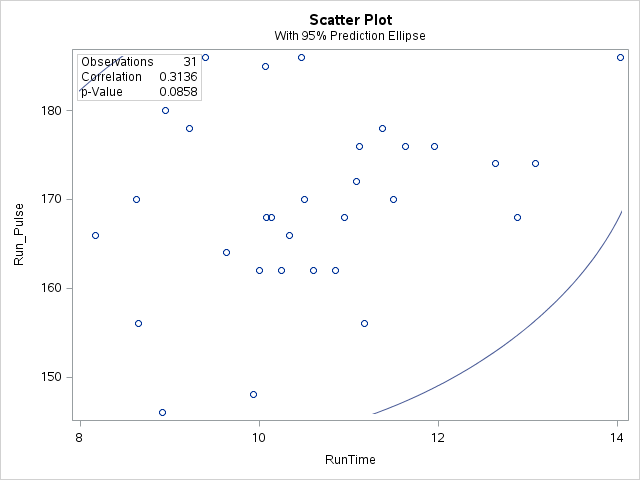
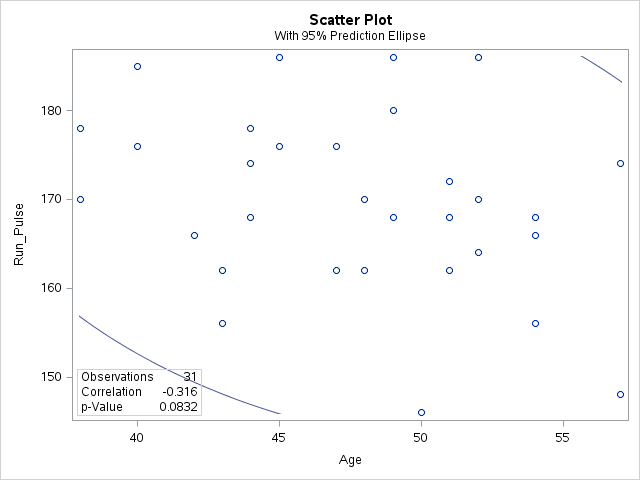
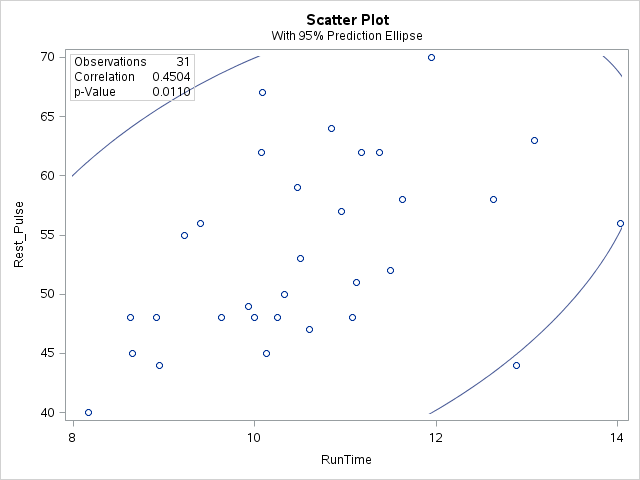
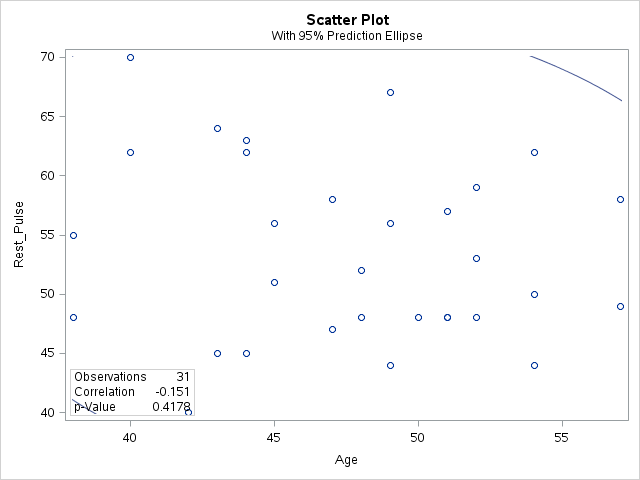
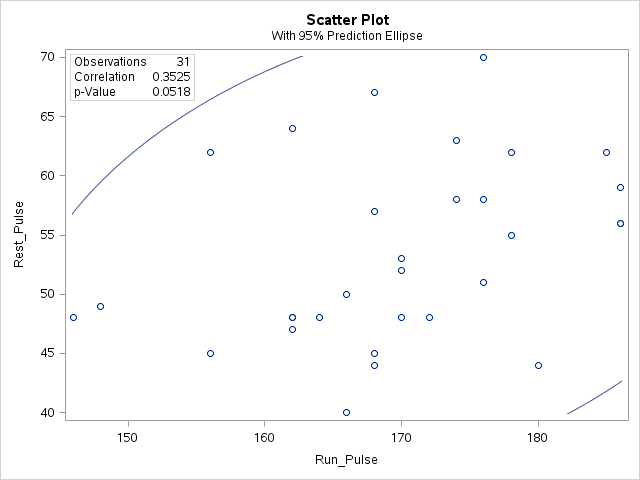
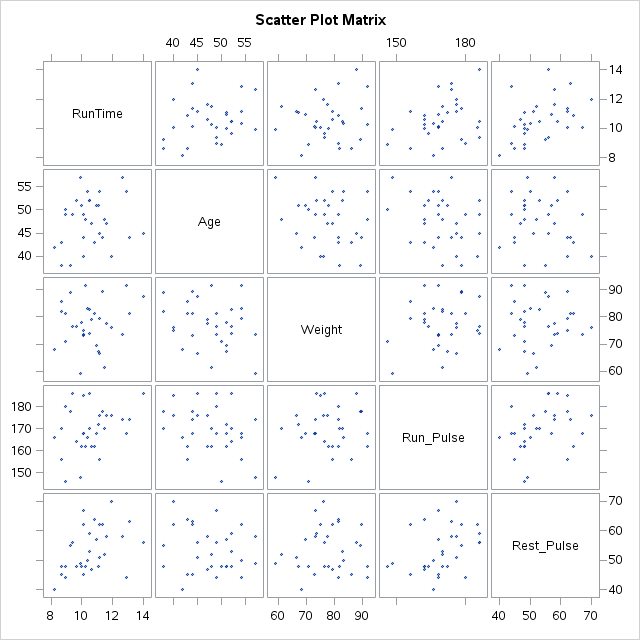

In [5]:
ods graphics on / imagemap=off;
proc corr data=statdata.fitness 
   plots=(matrix scatter); 
   var RunTime Age Weight Run_Pulse
       Rest_Pulse Maximum_Pulse Performance;
   id name;
   title "Correlation Matrix and Scatter Plot Matrix of Fitness Predictors";
run;
title;

In [6]:
ods graphics on;
title "Computing Pearson Correlation Coefficients";
proc corr data=exercise nosimple rank
/*plots = matrix(nvar=all);*/
 plots(only)=scatter (ellipse = confidence);
/*plots(only) = scatter(ellipse = none);*/
var Rest_Pulse Max_Pulse Run_Pulse Age;
with Pushups;      /*****/
run;
ods graphics off;

## Simple Regression Model 


See Ramon Littell, Walter Stroup, Rudolf Freund-SAS for Linear Models, Fourth Edition-SAS Publishing (2002) P11

The CLM option yields a confidence interval for the subpopulation mean, and the CLI
option yields a prediction interval for a value to be drawn at random from the subpopulation. The
CLI limits are always wider than the CLM limits, because the CLM limits accommodate only
variability in $\widehat{y}$, whereas the CLI limits accommodate variability in $\widehat{y}$ and variability in the future
value of y. This is true even though $\widehat{y}$ is used as an estimate of the subpopulation mean as well as a
predictor of the future value.

where NOINT is the option that specifies that no intercept be included. In other words, the fitted
regression plane is forced to pass through the origin.

Corresponding complications arise regarding the R-square statistic with no-intercept models.
Note that R-Square=0.9829 for the no-intercept model in Output 2.10 is greater than
R-Square=0.9373 for the model in Output 2.6, although the latter has two more parameters than
the former. This seems contrary to the general phenomenon that adding terms to a model causes
the R-square to increase. This seeming contradiction occurs because the denominator of the Rsquare
is the Uncorrected Total SS when the NOINT option is used. This is the reason for the
message that R-square is redefined at the top of Output 2.10. It is, therefore, not meaningful to
compare an R-square for a model that contains an intercept with an R-square for a model that does
not contain an intercept


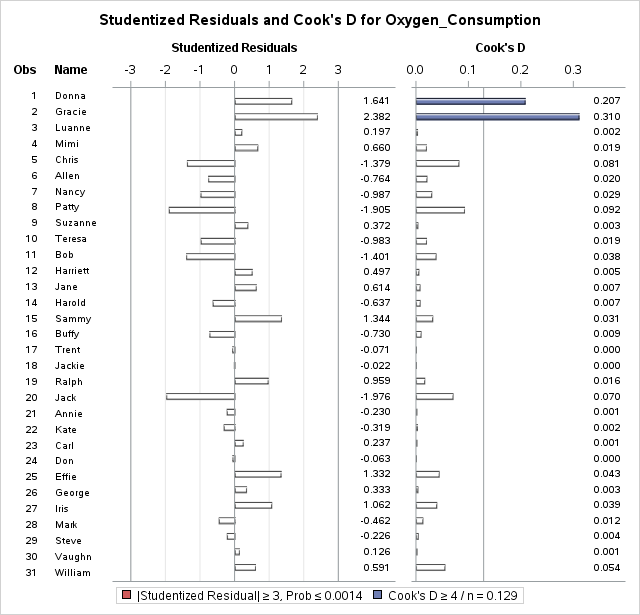
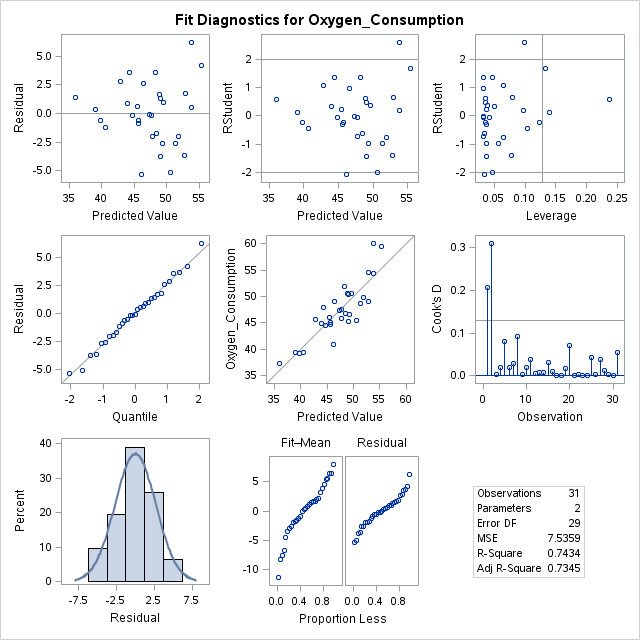
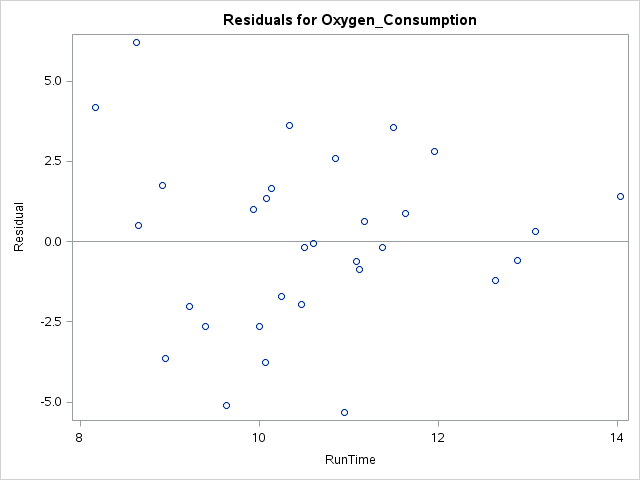
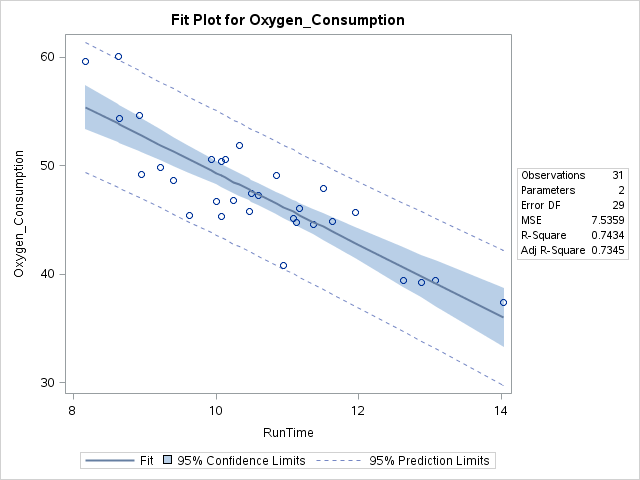

In [7]:
proc reg data=statdata.fitness;
   model Oxygen_Consumption = RunTime / p cli clm influence r xpx i;
   id name RunTime;
   title 'Predicting Oxygen_Consumption from RunTime';
run;
quit;
title;


The Model Sum of Squares is 633.01. This is the amount of variability that the model explains.

The Error Sum of Squares is 218.54. This is the amount of variability that the model does not explain.

The Total Sum of Squares is 851.55, which is the total amount of variability in the response.

The Mean Square column indicates the ratio of the sum of squares and the degrees of freedom.The mean square model is 633.01. This is calculated by dividing the model sum of squares by the model DF, which gives us the average sum of squares for the model. The mean square error is 7.54, which is an estimate of the population variance. This is calculated by dividing the error sum of squares by the error DF, which gives us the average sum of squares for
the error.

The Root MSE is 2.75. This is the square root of the mean square error in the Analysis of Variance table. 
The Root MSE is a measure of the standard deviation of Oxygen_Consumption at each value of RunTime.

The Dependent Mean is 47.38, which is the average of Oxygen_Consumption for all 31 subjects.

The Coefficient of Variation is 5.79. This is the size of the standard deviation relative to the mean.

The R-square value is .743, which is calculated by dividing the mean square for the model by the total 
sum of squares. The R-square value is between 0 and 1 and measures the proportion of variation 
observed in the response that the regression line explains.

Mean Square Between and Mean Square Within are used to calculate the F-ratio: 

If you create a 95% prediction interval, the interpretation is that you are 95% confident that 
your interval contains the new observation. 

For a given set of data, why is a prediction interval wider than a confidence interval? 
A prediction interval is wider than a confidence interval because single observations have 
more variability than sample means.

**The difference between a prediction interval and a confidence interval is the standard error.**

The standard error for a confidence interval on the mean takes into account the uncertainty 
due to sampling. The line you computed from your sample will be different from the line that 
would have been computed if you had the entire population, the standard error takes this 
uncertainty into account.

The standard error for a prediction interval on an individual observation takes into account 
the uncertainty due to sampling like above, but also takes into account the variability of the 
individuals around the predicted mean. The standard error for the prediction interval will be 
wider than for the confidence interval and hence the prediction interval will be wider than 
the confidence interval.

### Storing Parameter Estimates and Scoring

First, create a data set containing the values of the independent variable for which you want to make predictions. Concatenate the new data set with the original data set. Fit a simple linear regression model to the new data set and specify the P option in the MODEL statement. Because the concatenated observations contain missing values for the response variable, PROC REG doesn't include these observations when fitting the regression model. However, PROC REG does produce predicted values for these observations.

When you use a model to predict future values of the response variable given certain values of the predictor variable, you must stay within the range of values for the predictor variable used to create the model. For example, in the original Fitness data set, values of RunTime range from a little over 8 minutes to a little over 14 minutes. Based on that data, you shouldn't try to predict what Oxygen_Consumption would be for a RunTime value outside that range. The relationship between the predictor variable and the response variable might be different beyond the range of the data.


    PROC SCORE DATA=SAS-data-set 
       SCORE=SAS-data-set 
       OUT=SAS-data-set 
       TYPE=name 
       <options>;
    VAR variable(s);
    RUN;
    QUIT;
    
In the PROC SCORE statement, the DATA= option specifies the data set containing the observations to score, which is Need_Predictions. The SCORE= option specifies the data set containing the parameter estimates, which is Estimates. The OUT= option specifies the data set that PROC SCORE creates. Let's call this data set Scored. Finally, the TYPE= option tells PROC SCORE what type of data the SCORE= data set contains. In this case, specifying TYPE=PARMS tells SAS to use the parameter estimates in the Estimates data set. The VAR statement specifies the numeric variables to use in computing scores. These variables must appear in both the DATA= and SCORE= input data sets. If you don't specify a VAR statement, PROC SCORE uses all the numeric variables in the SCORE= data set. So it's important to specify a VAR statement with PROC SCORE, because you rarely use all the numeric variables in your data set to compute scores. We'll use RunTime. Next, let's see this process in action.

    

In [8]:
data need_predictions;
   input RunTime @@;
   datalines;
9 10 11 12 13 14 15
;
run;

proc reg data=statdata.fitness noprint outest=estimates; 
   model Oxygen_Consumption=RunTime;
run;
quit;
 
proc print data=estimates;
   title "OUTEST= Data Set from PROC REG";
run;
title;

proc print data = need_predictions;
 title "need_predictions Data Set";
run;
  
proc score data=need_predictions /*dataset to score*/ 
           score=estimates  /*dataset containing the parmeter estimates*/
           out=scored       /*the output dataset*/
           type=parms;      /*tells PROC SCORE what type of data the SCORE= data set contains.*/
   var RunTime; 
   /*The VAR statement specifies the numeric variables to use in computing scores. 
   These variables must appear in both the DATA= and SCORE= input data sets*/ 
run;
 
proc print data=Scored;
   title "Scored New Observations";
run;
title;


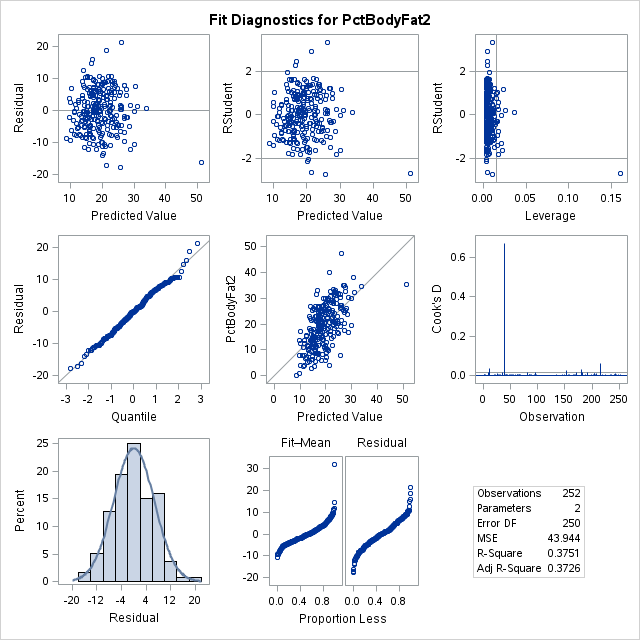
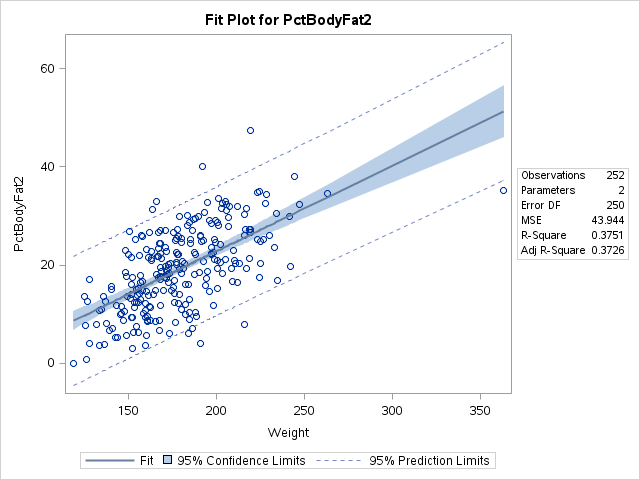

In [9]:
proc reg data=statdata.bodyfat2 outest=estimates;
   model PctBodyFat2=Weight;
   title "Regression of % Body Fat on Weight";
run;

data toscore;
   input Weight @@;
   datalines;
125 150 175 200 225
;
run;

proc score data=toscore score=estimates
     out=scored type=parms;
   var Weight;
run;

proc print data=scored;
   title "Predicted % Body Fat from Weight 125 150 175 200 225";
run;
title;

### The PLM Procedure

The PLM procedure performs post-fitting statistical analyses and plotting for the contents of a SAS item store that were previously created with the STORE statement in some other SAS/STAT procedure. 

The statements that are available in the PLM procedure are designed to reveal the contents of the source item store via the Output Delivery System (ODS) and to perform post-fitting tasks.

The use of item stores and PROC PLM enables you to separate common post-processing tasks, such as testing for treatment differences and predicting new observations under a fitted model, from the process of model building and fitting. A numerically expensive model fitting technique can be applied once to produce a source item store. The PLM procedure can then be called multiple times, and the results of the fitted model are analyzed without incurring the model fitting expenditure again.

Selected PROC PLM option:

* RESTORE	specifies the source item store for processing.
* Selected PROC PLM procedure statements:
* EFFECTPLOT produces a display of the fitted model and provides options for changing and enhancing the displays.
* LSMEANS computes and compares least squares means (LS-means) of fixed effects.
* LSMESTIMATE	provides custom hypothesis tests among least squares means.
* SHOW uses the Output Delivery System to display contents of the item store. This statement is useful for verifying   that the contents of the item store apply to the analysis and for generating ODS tables.
* SLICE provides a general mechanism for performing a partitioned analysis of the LS-means for an interaction. This analysis is also known as an analysis of simple effects. The SLICE statement uses the same options as the LSMEANS statement.
* WHERE is used in the PLM procedure when the item store contains BY-variable information and you want to apply the PROC PLM statements to only a subset of the BY groups.


    PROC PLM RESTORE=item-store-specification<options>;
        EFFECTPLOT <plot-type <(plot-definition options)>> 
              </ options>;
        LSMEANS <model-effects > </ options>;
        LSMESTIMATE model-effect <'label'> values 
          <divisor=n><,...<'label'> values
          <divisor=n>> </ options>;
    SHOW options;
    SLICE model-effect </ options>;
    WHERE expression ;
    RUN;

## Multiple Regression Model


In [10]:
proc sql outobs = 20; 
select *
from statdata.ameshousing3 ;
run;

proc univariate data=statdata.ameshousing3;
var SalePrice Basement_Area Lot_Area;
run;

Run the same model in PROC GLM. When you run a linear regression model with only two predictor variables, the output includes a contour fit plot by default. We specify CONTOURFIT to tell SAS to overlay the contour plot with a scatter plot of the observed data.

Here is the contour fit plot with the overlaid scatter plot that we requested. We can use this plot to see how well your model predicts observed values. The plot shows predicted values of SalePrice as gradations of the background color from blue, representing low values, to red, representing high values. The dots, which are similarly colored, represent the actual data. Observations that are perfectly fit would show the same color within the circle as outside the circle. The lines on the graph help you read the actual predictions at even intervals.

For example, this point near the upper-right represents an observation with a basement area of about 1,500 square feet, a lot size of about 17,000 square feet, and a predicted value of over \$180,000 for sale price. However, the dot’s color shows that its observed sale price is actually closer to about \$160,000.


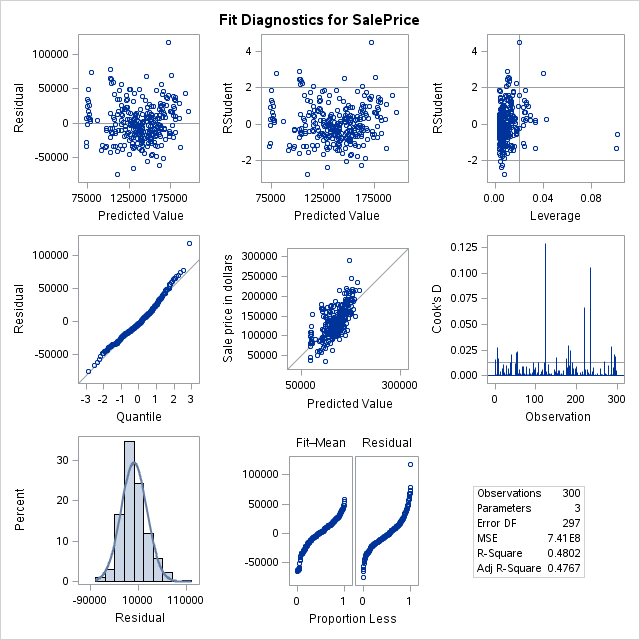
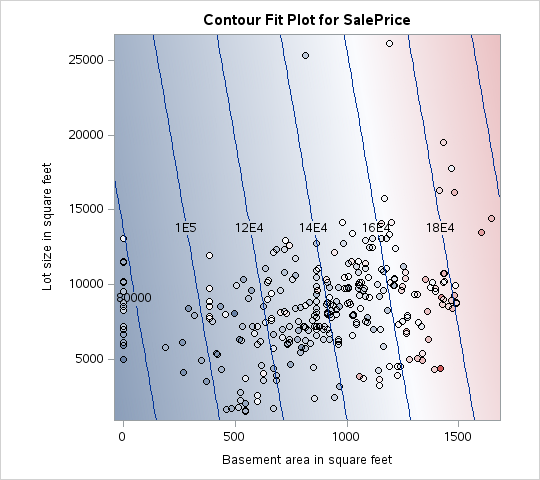
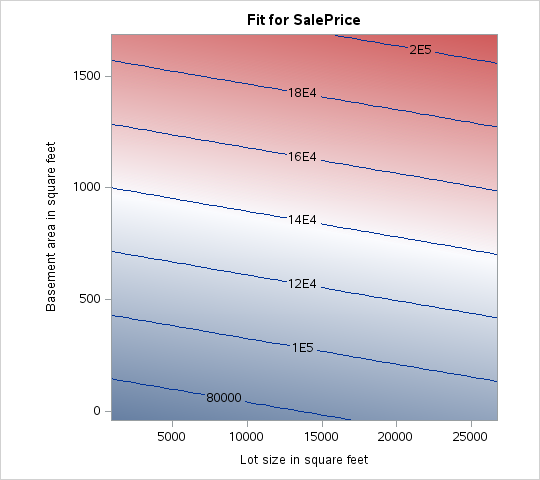
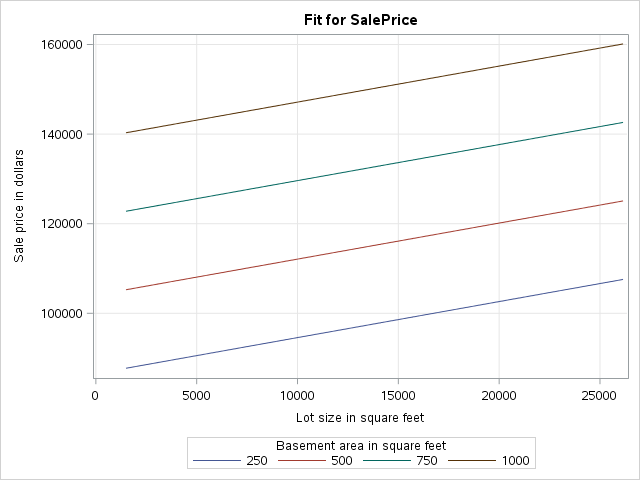

In [11]:
ods graphics on;

proc reg data=statdata.ameshousing3 ;
    model SalePrice=Basement_Area Lot_Area;
    title "Model with Basement Area and Lot Area";
run;
quit;

proc glm data=statdata.ameshousing3 
         plots(only)=(contourfit);
    model SalePrice=Basement_Area Lot_Area;
    contrast 'Basement_Area=0' Basement_Area 1; 
    contrast 'Basement_Area=Lot_Area' Basement_Area 1 Lot_Area -1;
    contrast 'Basement_Area=Lot_Area=0' Basement_Area 1,  Lot_Area 1;
    
    /*CONTRAST statements can be used to test hypotheses about
    any linear combination of parameters in the model.*/
    
   estimate 'Basement_Area=0' Basement_Area 1; 
   estimate 'Basement_Area=Lot_Area' Basement_Area 1 Lot_Area -1; 
    
    /*The ESTIMATE statement is used in essentially the same way as the CONTRAST statement. 
But instead of F-tests for linear combinations, you get estimates of them along with standard errors.
However, the ESTIMATE statement can estimate only one linear combination at a time, whereas the
CONTRAST statement could be used to test two or more linear combinations simultaneously */
    
    store out=multiple;
    title "Model with Basement Area and Gross Living Area";
run;
quit;

proc plm restore=multiple plots=all;
    effectplot contour (y=Basement_Area x=Lot_Area);
    effectplot slicefit(x=Lot_Area sliceby=Basement_Area=250 to 1000 by 250);
run; 

title;

## Model Selection 

### Automatic Model Selection

In the MODEL statement, following a forward slash, you add the SELECTION= option to specify the method used to select the model. The default is NONE, which in this case would calculate the full regression model, because you specified all the variables in the MODEL statement. To calculate the all-possible regression model instead, you specify the CP, RSQUARE, or ADJRSQ statistics as the SELECTION= value. Here all three are specified. The first statistic that you list here determines the sorting order in the output. 

Here's a question: For this PROC REG step, how are the models sorted? Specifying CP as the first statistic sorts the models by the value of CP. To produce only a specific number of models, you can specify the BEST= option in the MODEL statement. For example, BEST=20 displays the 20 best models based on your sorting statistic, which in this case is CP. 

Finally, you can add an optional label to the MODEL statement to label your output. For this all-possible regression model, let's add the label ALL_REG. Notice that the label must end in a colon.

Each star in the Cp plot represents the best model for a given number of parameters





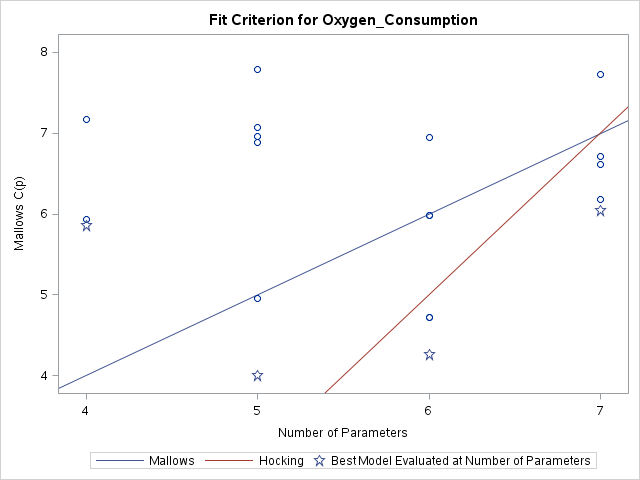

In [12]:
ods graphics / imagemap=on;
proc reg data=statdata.fitness plots(only)=(cp);
   ALL_REG: model Oxygen_Consumption= 
   Performance RunTime Age Weight
   Run_Pulse Rest_Pulse Maximum_Pulse
   / selection=cp rsquare adjrsq best=20;
title 'Best Models Using All-Regression Option';
run;
quit;
title;


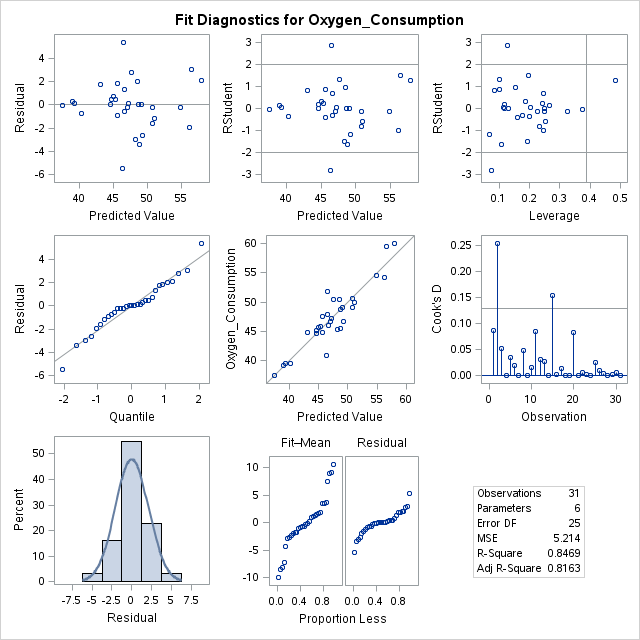
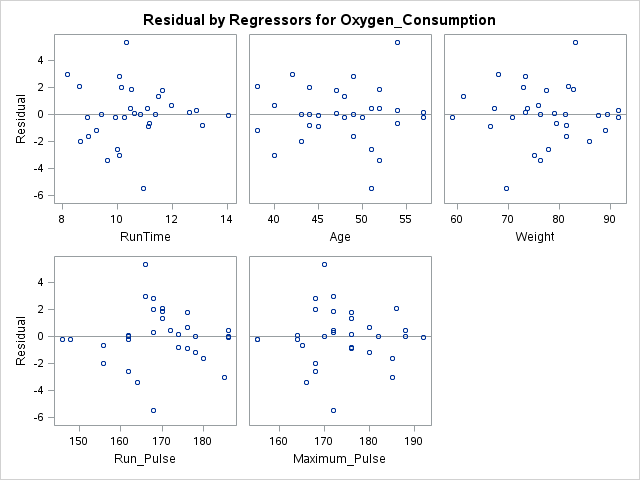

In [13]:
proc reg data=statdata.fitness;
   PREDICT_mpc: model Oxygen_Consumption= 
                  RunTime Age Run_Pulse Maximum_Pulse; 
   EXPLAIN_hcp: model Oxygen_Consumption= 
                  RunTime Age Weight Run_Pulse Maximum_Pulse; 
   title 'Check "Best" Two Candidate Models';
run;
quit;
title;

### Stepwise selection methods

Stepwise selection methods include forward, backward, and stepwise approaches. In this course, you use these methods to select variables based on their p-values, and we will discuss other methods as well. Let's look at each of these three methods in detail.

Forward selection starts with no predictor variables in the model. It selects the best one-variable model (the most significant variable when run by itself). Then it selects the best two-variable model that includes the variable in the first model. So, after a variable is added to the model, it stays in, even if it becomes insignificant later. Forward selection keeps adding variables, one at a time, until no significant terms are left to add. 

Backward selection, also called backward elimination, starts with all predictor variables in the model. It removes variables one at a time, starting with the most non-significant variable. After a variable is removed from the model, it cannot reenter. Backward selection stops when only significant terms are left in the model. 


Using automated model selection results in biases in parameter estimates, predictions, and standard errors, incorrect calculation of degrees of freedom, and p-values that tend to err on the side of overestimating significance. 

So, how can you avoid these issues? One way is to hold out some of your data in order to perform an honest assessment of how well your model performs on a different sample of data than you used to develop the model. You split your data into two data sets: the training data and the holdout data, which is also called the validation data. You use the training data to build your model, and you use the holdout data to assess and compare potential models.

Other honest assessment approaches include cross-validation or bootstrapping. You might choose to perform cross-validation if your data set isn’t large enough to split and hold out some data for validation. Alternatively, you can use a bootstrapping method to obtain correct standard errors and p-values. Bootstrapping is a resampling method that tries to approximate the distribution of the parameter estimates to estimate the standard error.

One last thing to keep in mind is that the stepwise techniques don’t take any any collinearity
in your model into account. Collinearity means that predictor variables in the same model are 
highly correlated. If collinearity is present in your model, you might want to consider first 
reducing the collinearity as much as possible and then running stepwise methods on the remaining 
variables.


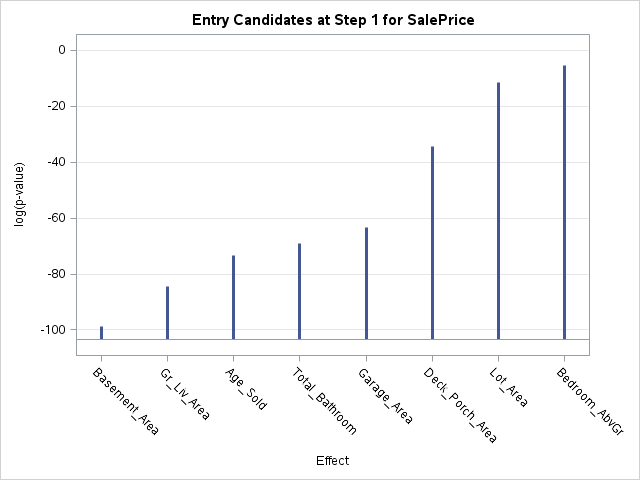
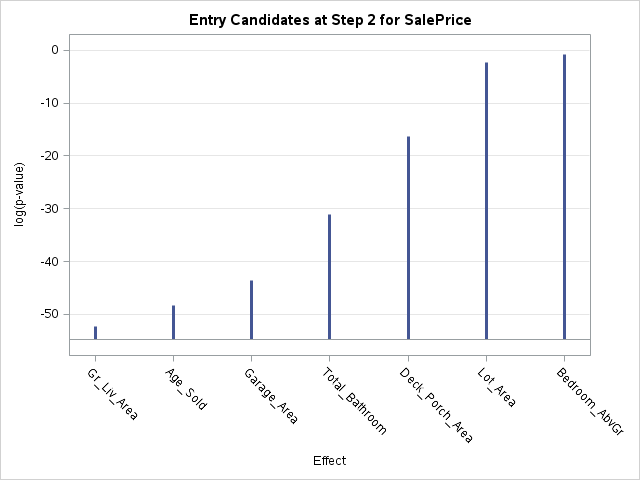
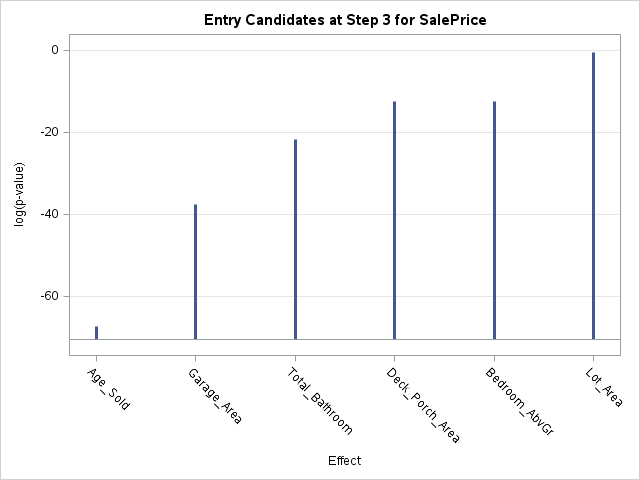
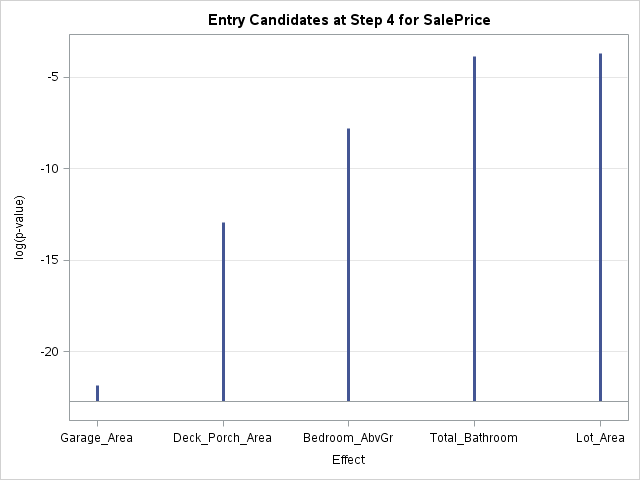
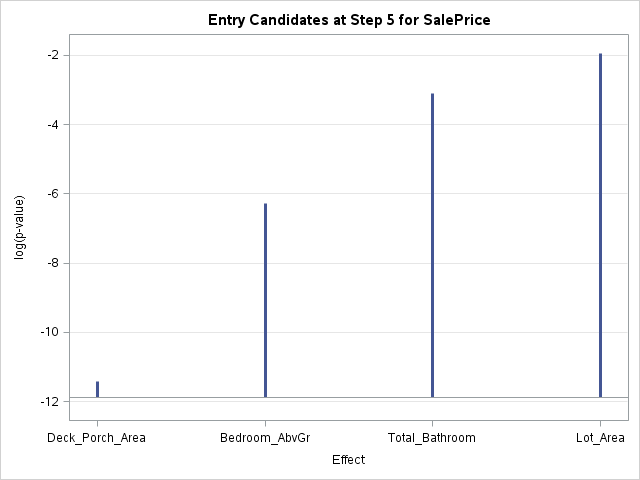
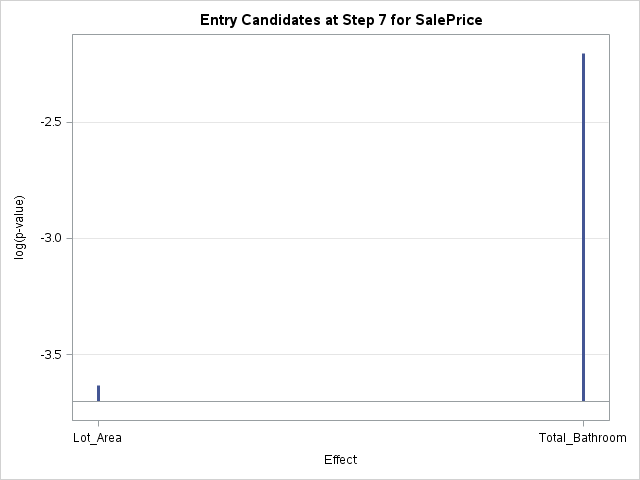
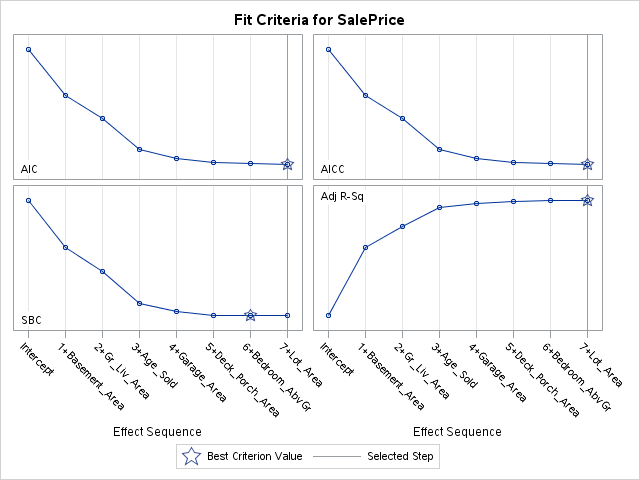
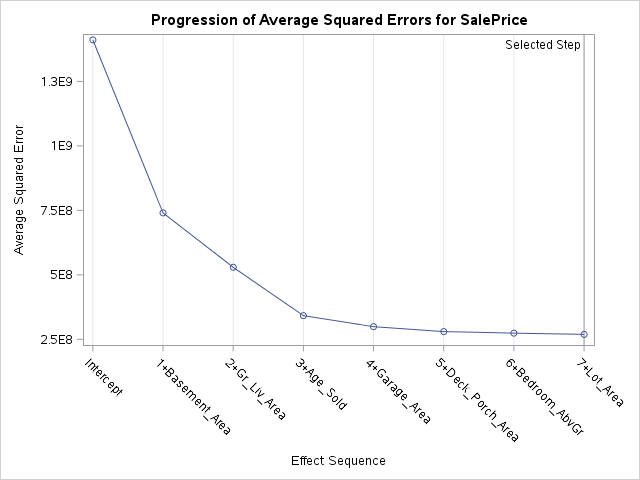

In [14]:
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
              Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom ;

ods graphics on;

proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISE: model SalePrice=&interval / selection=stepwise showpvales
                   details=steps select=SL slstay=0.05 slentry=0.05;
   title "Stepwise Model Selection for SalePrice - SL 0.05";
run;

/*Optional code that will execute forward and backward selection, each with slentry and slstay = 0.05.
proc glmselect data=statdata.ameshousing3 plots=all;
   FORWARD: model SalePrice=&interval / selection=forward details=steps select=SL slentry=0.05;
   title "Forward Model Selection for SalePrice - SL 0.05";
run;

proc glmselect data=statdata.ameshousing3 plots=all;
   BACKWARD: model SalePrice=&interval / selection=backward details=steps select=SL slstay=0.05;
   title "Backward Model Selection for SalePrice - SL 0.05";
run;
*/


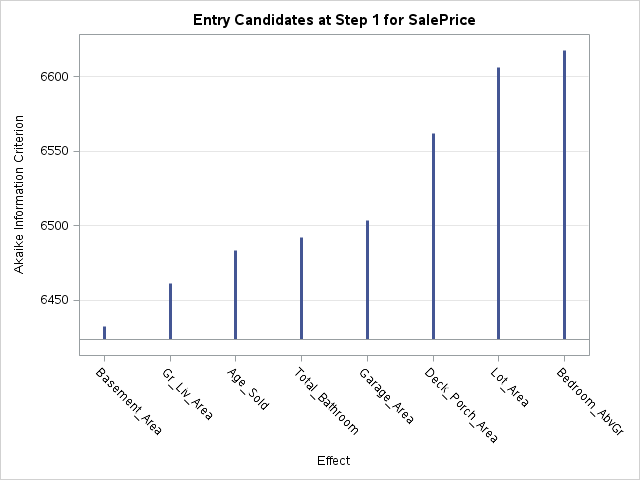
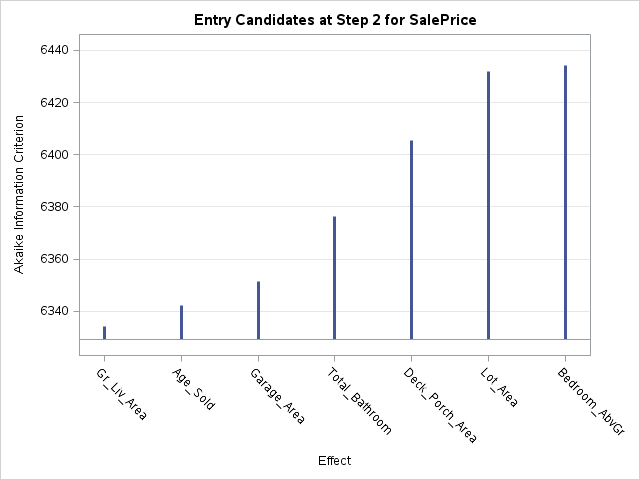
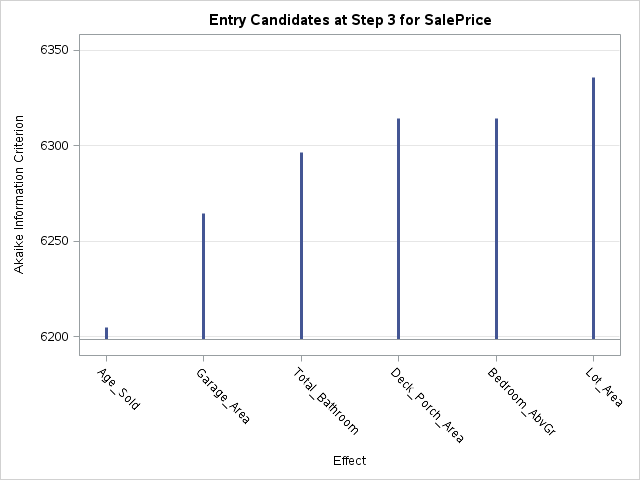
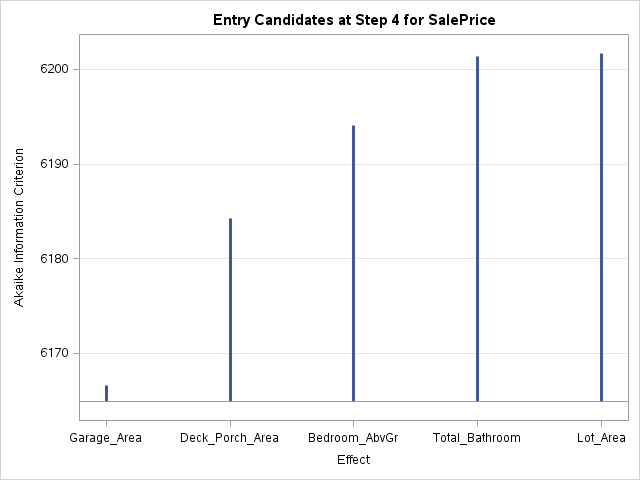
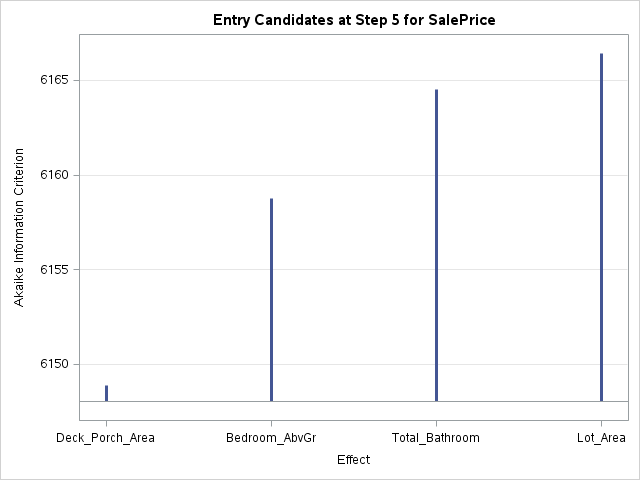
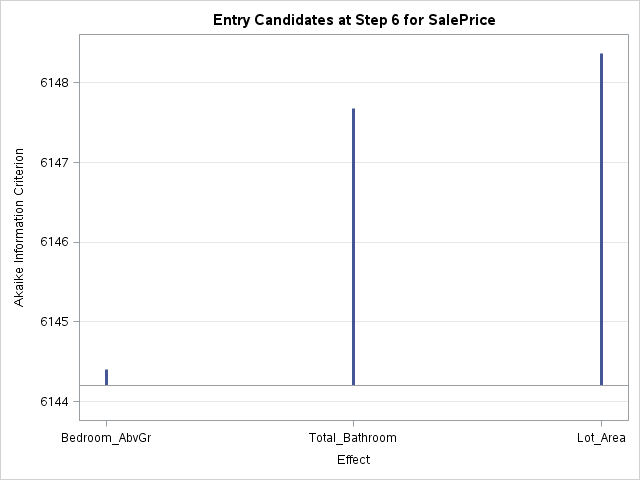
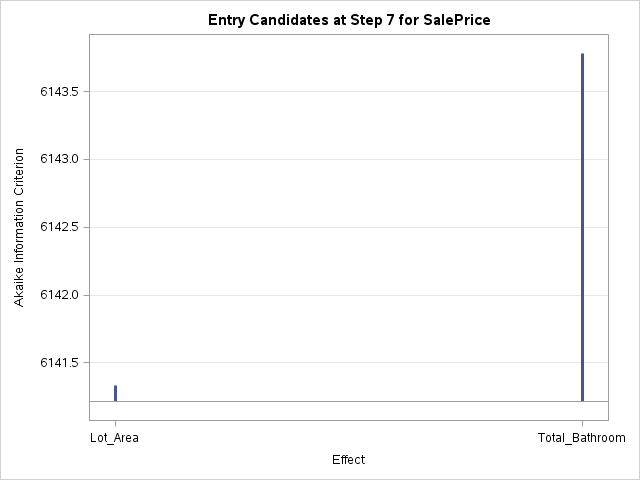
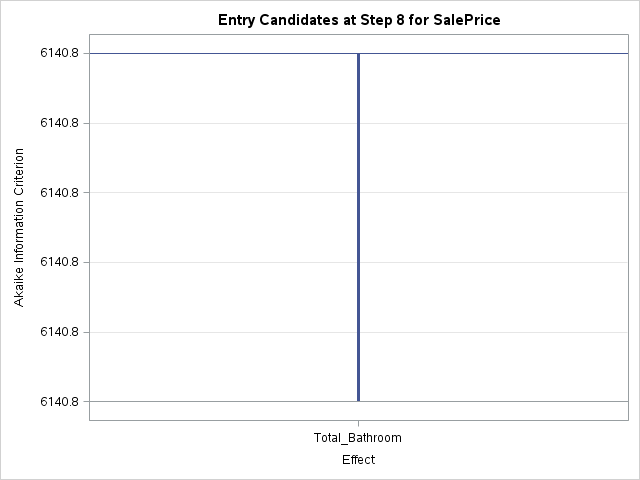
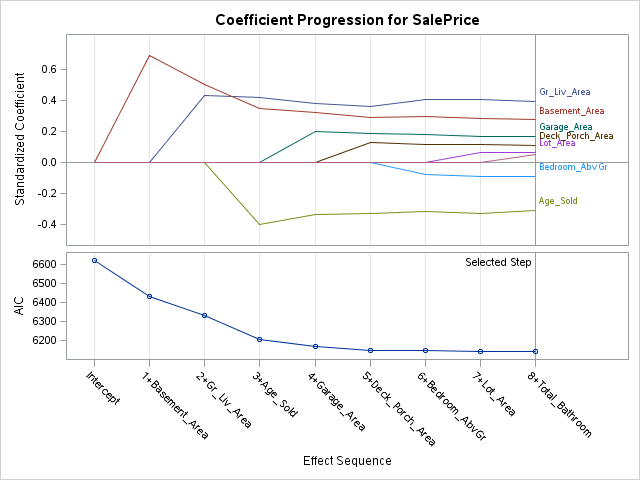
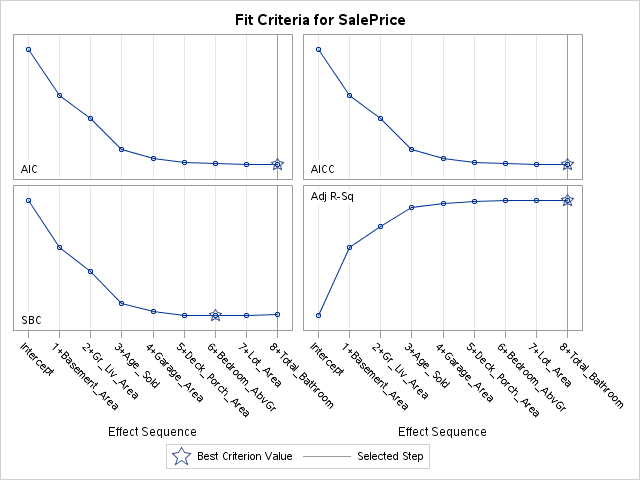
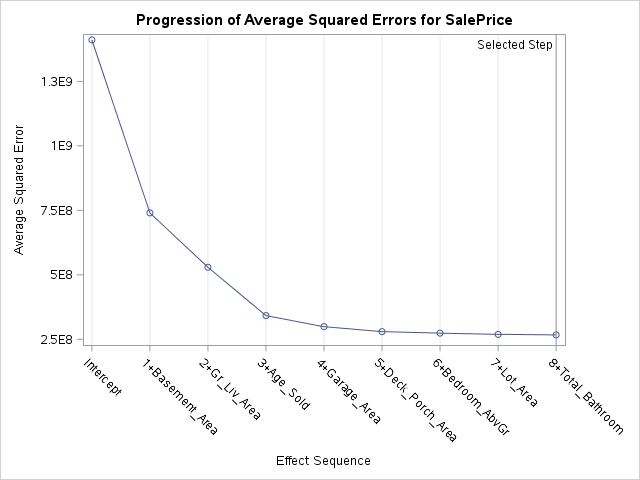
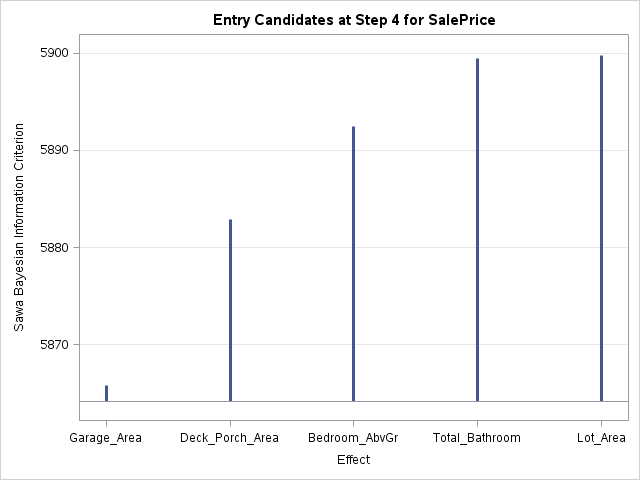
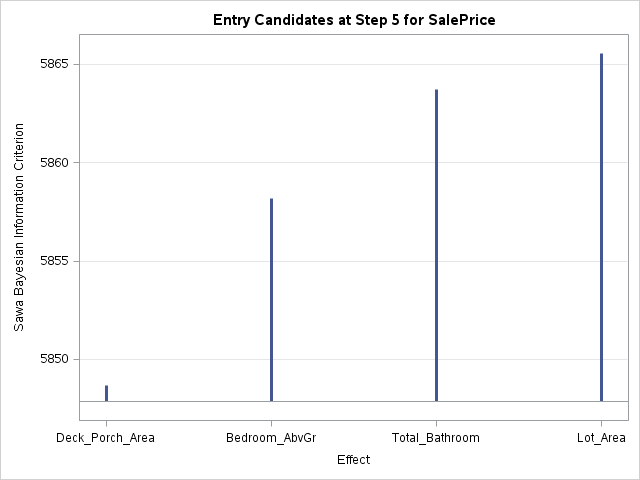
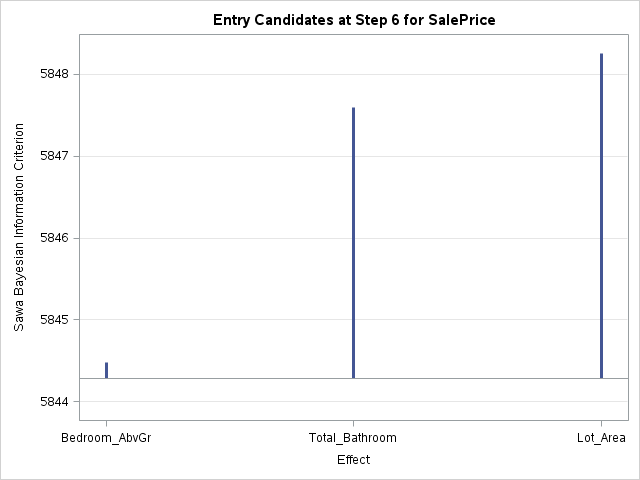
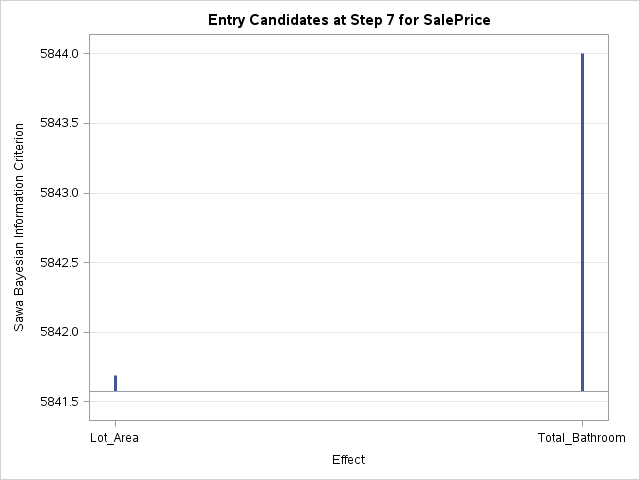
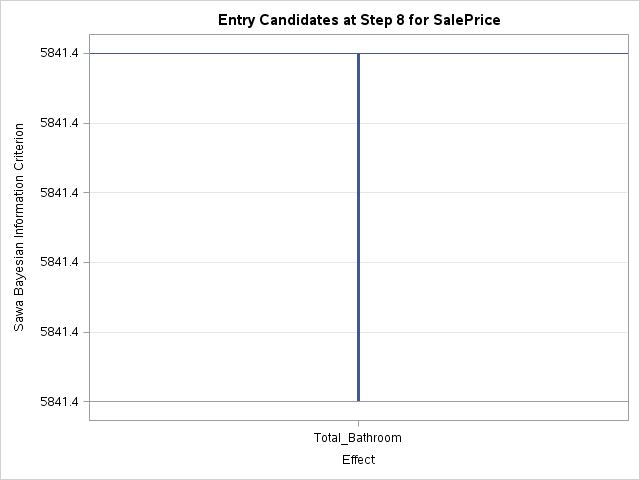
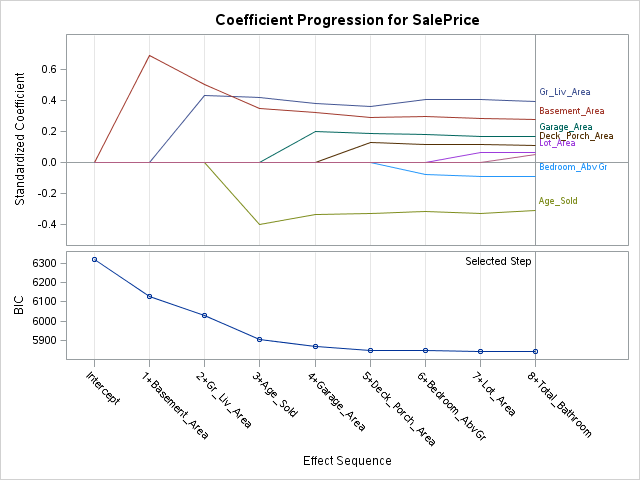
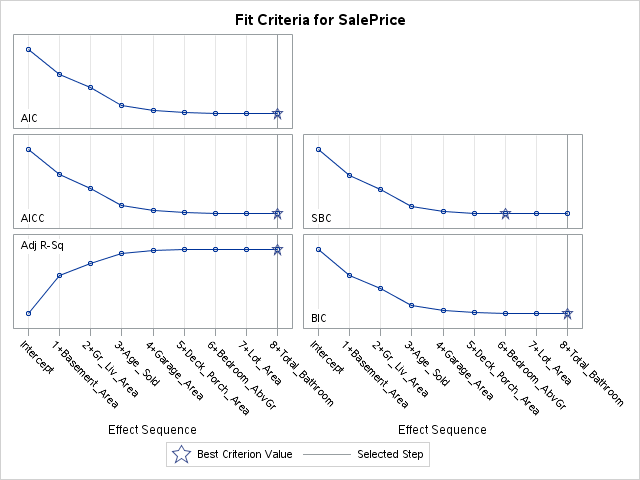
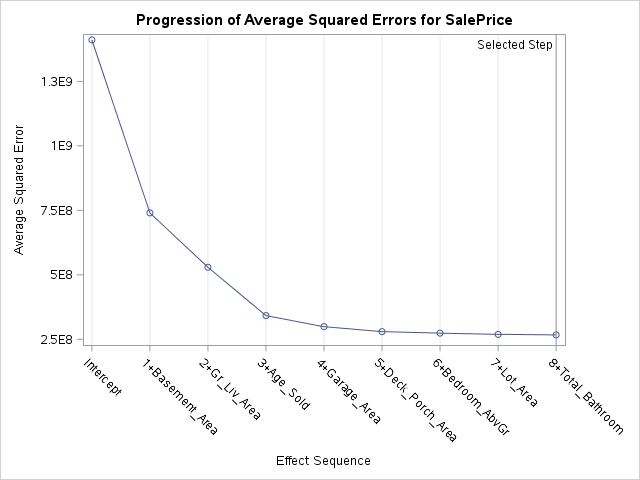
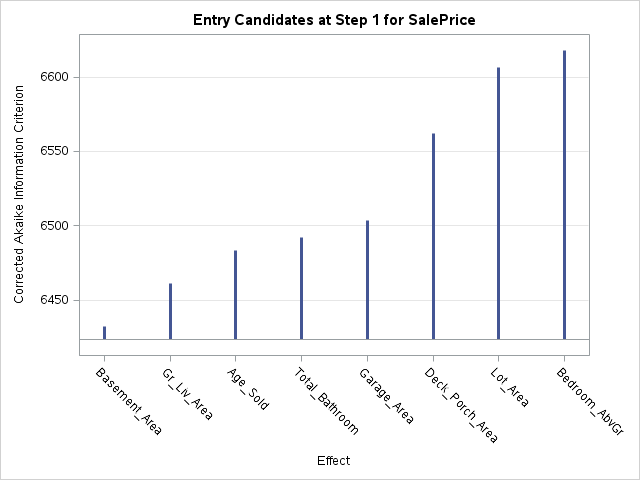
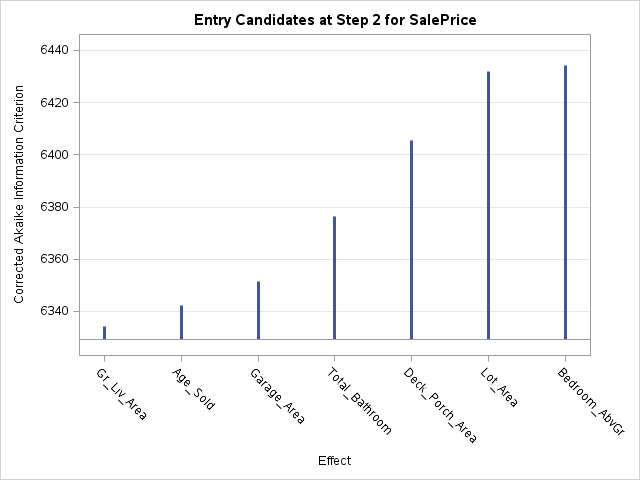
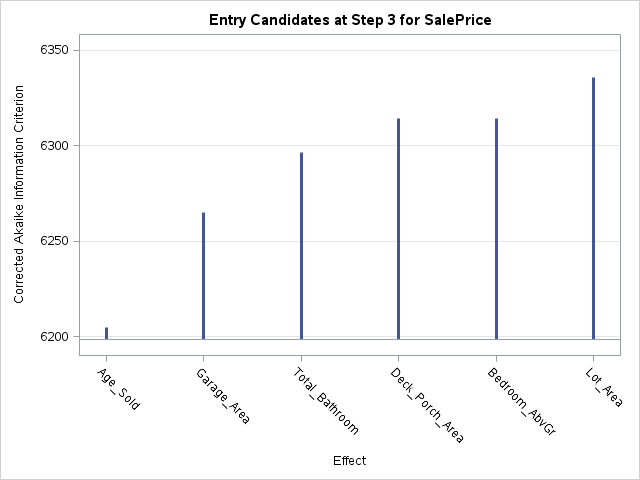
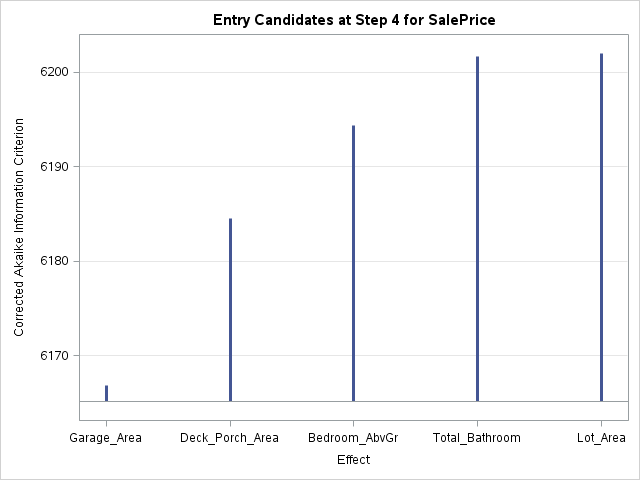
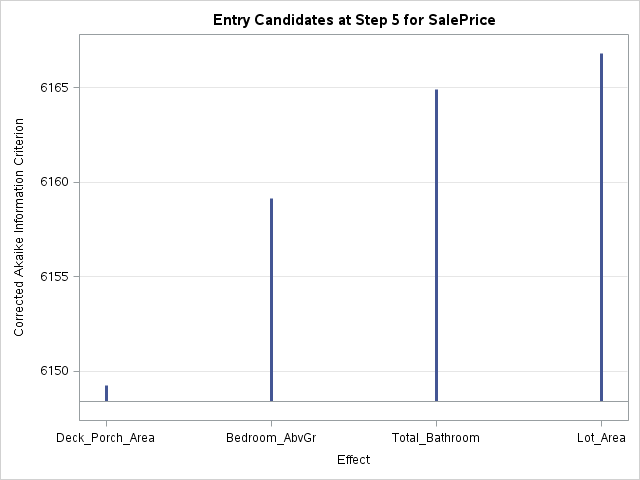
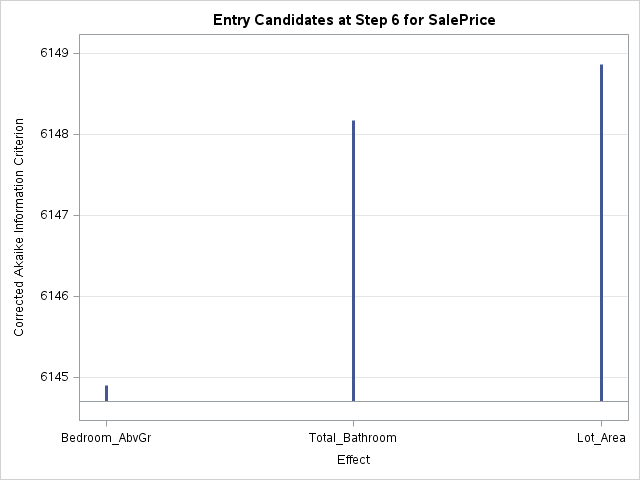
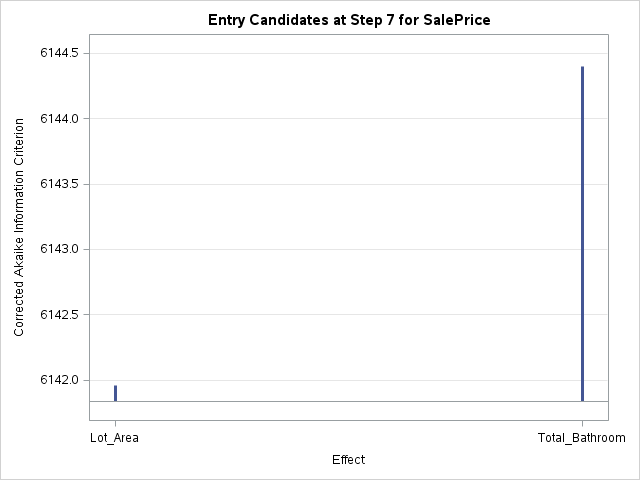
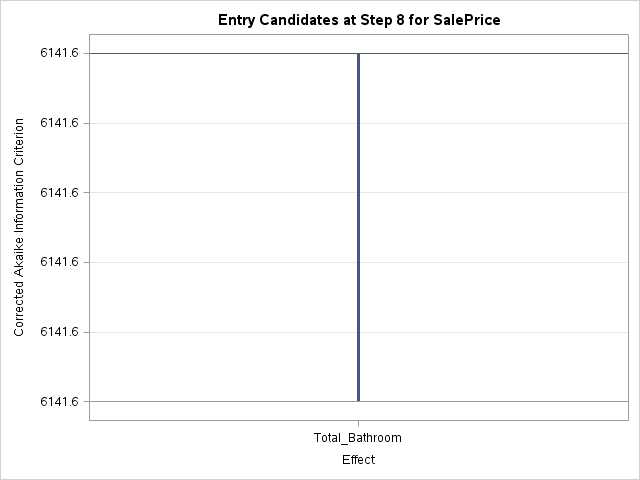
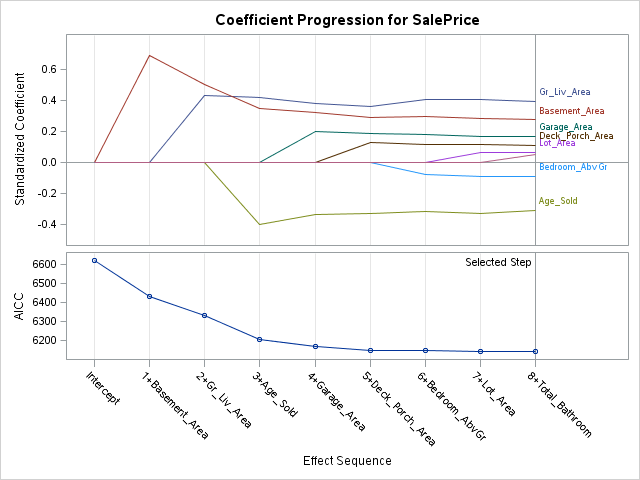
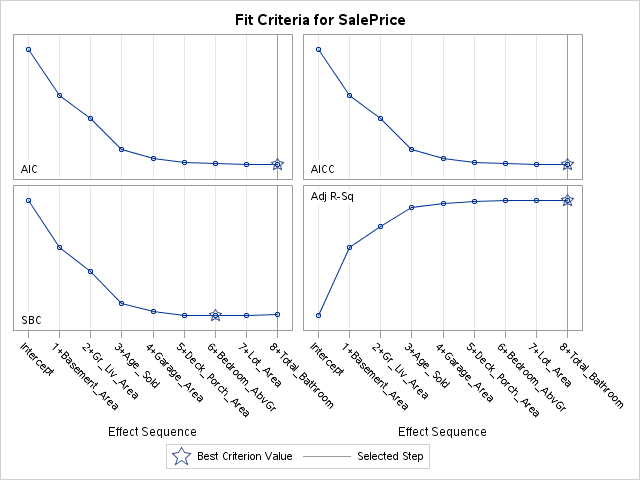
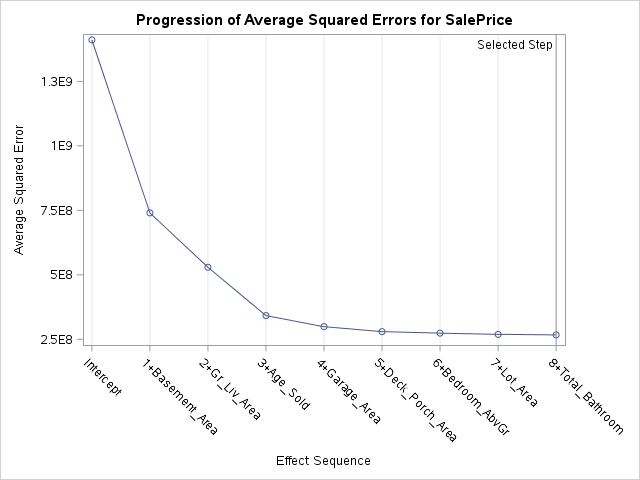
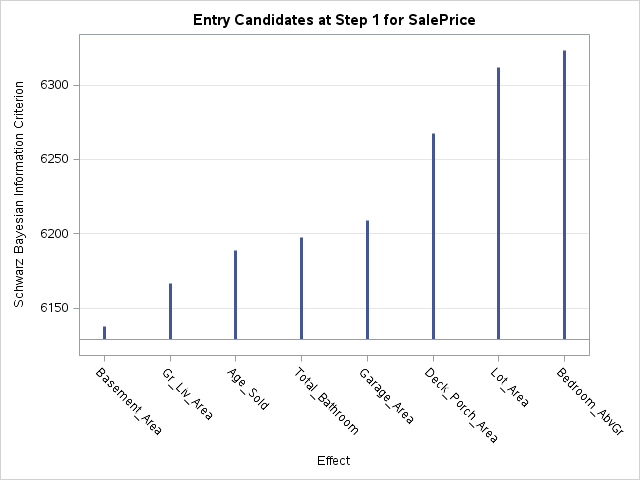
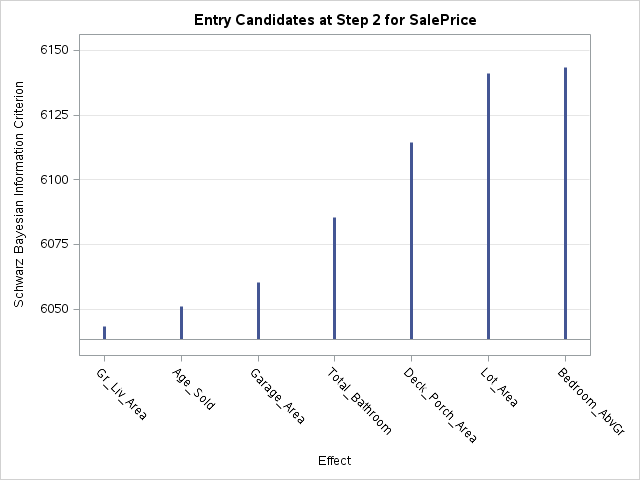
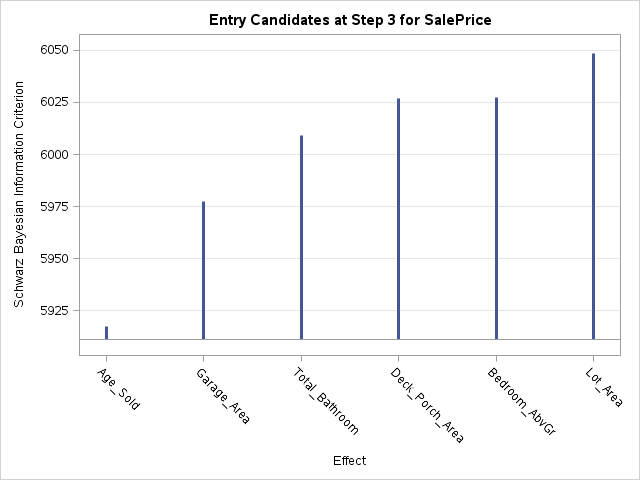
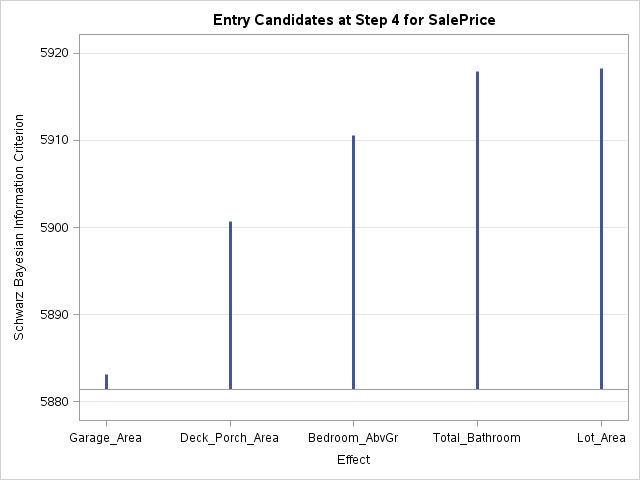
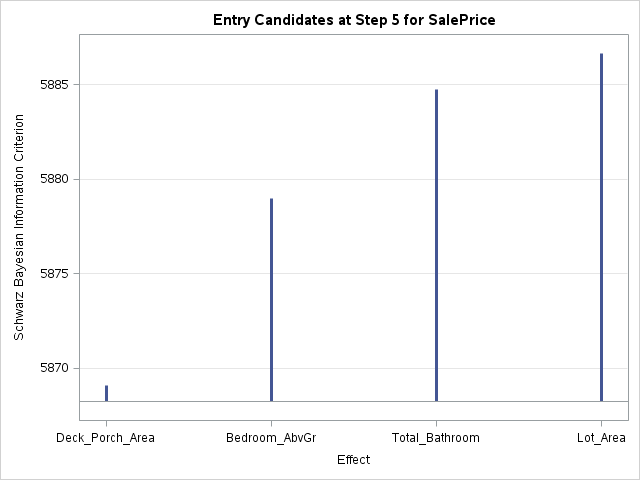
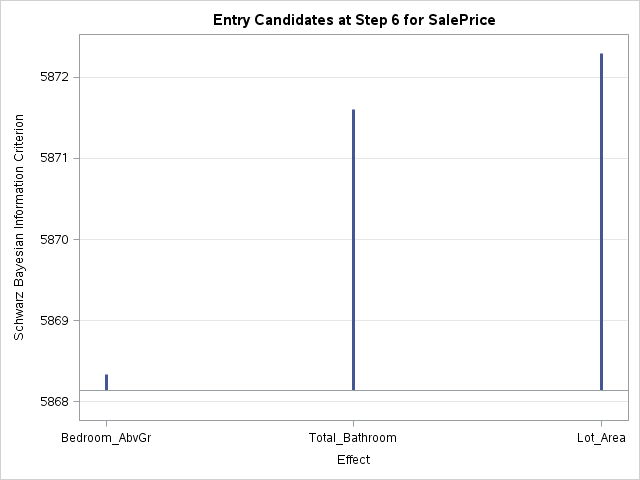
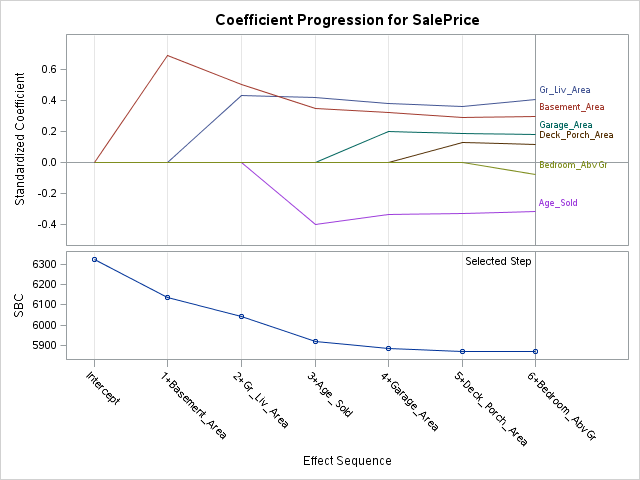
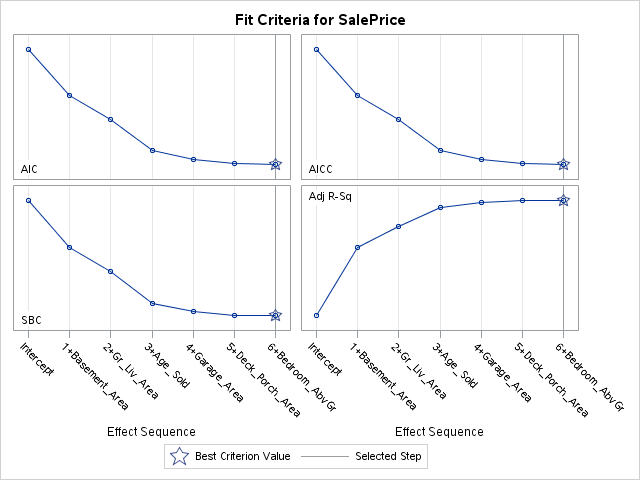
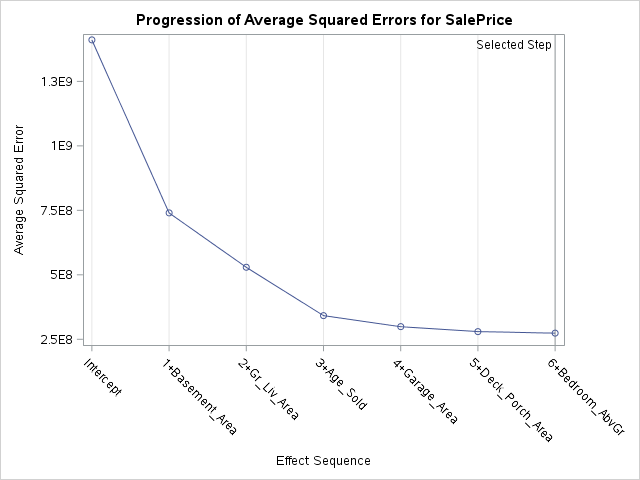

In [15]:
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
              Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom ;

ods graphics on;
proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISEAIC: model SalePrice = &interval / selection=stepwise details=steps select=AIC;
   title "Stepwise Model Selection for SalePrice - AIC";
run;

proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISEBIC: model SalePrice = &interval / selection=stepwise details=steps select=BIC;
   title "Stepwise Model Selection for SalePrice - BIC";
run;

proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISEAICC: model SalePrice = &interval / selection=stepwise details=steps select=AICC;
   title "Stepwise Model Selection for SalePrice - AICC";
run;

proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISESBC: model SalePrice = &interval / selection=stepwise details=steps select=SBC;
   title "Stepwise Model Selection for SalePrice - SBC";
run;

## Include= option

In [16]:
title "Forcing Variables into a Stepwise Model";
proc reg data=exercise;
model Pushups = Max_Pulse Age Rest_Pulse Run_Pulse /
selection = stepwise include=1;
run;
quit;

## Influential Observations

The INFLUENCE option gives you statistics that show you how much each observation
changes aspects of the regression depending on whether that observation is included. The
R option gives you more details about the residuals, as well as the value of the Cook’s D
statistic.

Plot Name | Description
---- | ----
Cooksd Cook’s D statistic | (the effect on the predicted value)
Rstudentbypredicted | Externally Studentized residuals by predicted value
DFFITS | The difference in the overall effect on the betas
DFBETAS | The difference on each beta (one computed for each variable)

The **Cook's D statistic** measures the distance between the set of parameter estimates with that observation deleted from your regression analysis and the set of parameter estimates with all the observations in your regression analysis. If any observation has a Cook's D statistic greater than 4 divided by n, where n is the sample size, that observation is influential. The Cook's D statistic is most useful for identifying influential observations when the purpose of your model is **parameter estimation**.

**STUDENT residuals** are calculated by dividing the residuals by their standard errors, so you can think of each STUDENT residual as roughly equivalent to a z-score. Typically, people consider z-scores large if their absolute value is greater than 2. So, for a relatively small sample size, a cutoff value of plus or minus 2 is reasonable for STUDENT residuals. However, with a large sample, it's very likely that even more STUDENT residuals greater than plus or minus 2 will occur just by chance. So, for larger data sets, you should typically use a larger cutoff value, the absolute value of 3.

SAS computes the **RStudent** value by computing the residual between each data point and a
regression line that was computed with that data point removed, and then dividing by the
standard error. Why is this computation necessary? If you have a very influential data
point, it will pull the line (or surface) closer to the point. Then, when you compute the
residual, you get a smaller value than if you had computed the regression with the data
point omitted. Various texts refer to the RStudent residuals as deleted residuals or
externally standardized residuals.You can use two rules of thumb to evaluate RSTUDENT residuals. First, if the RSTUDENT residual is different from the STUDENT residual, the observation is probably influential. Second, if the absolute value of the RSTUDENT residuals is greater than 2 or 3, you've probably detected an influential observation.

**DFFITS** measures the impact that each observation has on its own predicted value. For each observation, DFFITS is calculated using two predicted values. The first predicted value is calculated from a model using the entire data set to estimate model parameters. The second predicted value is calculated from a model using the data set with that particular observation removed to estimate model parameters. The difference between the two predicted values is divided by the standard error of the predicted value, without the observation. If the standardized difference between these predicted values is large, that particular observation has a large effect on the model fit. The rule of thumb for DFFITS has two versions. The general cutoff value is 2. The more precise cutoff is 2 times the square root of p divided by n, where p is the number of terms in the model, including the intercept, and n is the sample size. If the absolute value of DFFITS for any observation is greater than this cutoff value, you've detected an influential observation. DFFITS is most useful for **predictive models**.

**DFBETAS** measure the change in each parameter estimate. One DFBETA is calculated per predictor variable per observation. Each DFBETA is calculated by taking the estimated coefficient for that particular predictor variable, using all the data, and subtracting the estimated coefficient for that particular predictor variable with the current observation removed. This difference in the betas is divided by its standard error. This calculation is repeated for all predictor variables and all observations. Large DFBETAS indicate observations that are influential in estimating a given parameter. For DFBETAS, you use the same two rules of thumb as for DFFITS. The general cutoff value is 2. The more precise cutoff is $2{\sqrt{1/n}}$, where n is the sample size. 

The DFBETAS plot is a panel plot. It contains one plot for each parameter. In this case, because we have so many parameters, SAS created two panels.

**You can use STUDENT residuals to detect outliers. To detect influential observations, you can use RSTUDENT residuals and the DFFITS and Cook's D statistics.**

What to do with infuential observations? 

First, recheck for data entry errors.

Second, if the data appears to be valid, consider whether you have an adequate model. A different model might fit the data better. Here's one rule of thumb: Divide the number of influential observations you detect by the number of observations in your data set. If the result is greater than 5%, you probably have the wrong model. You might need a model that uses higher order terms. 

Third, determine whether the influential observation is valid but just unusual. If you had a larger sample size there might be more observations similar to the unusual one. You might have to collect more data to confirm the relationship suggested by the influential observation.


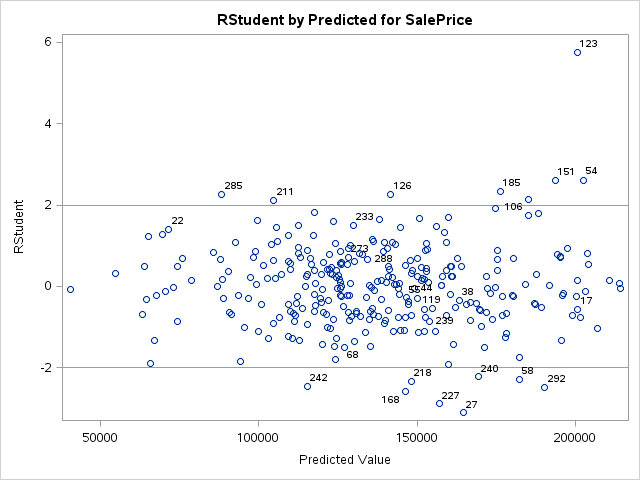
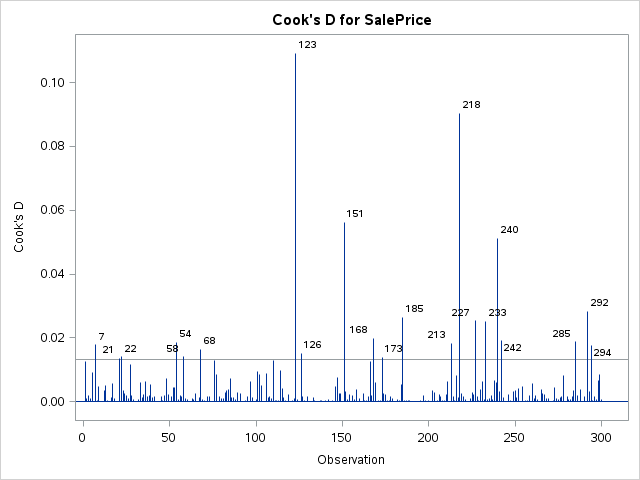
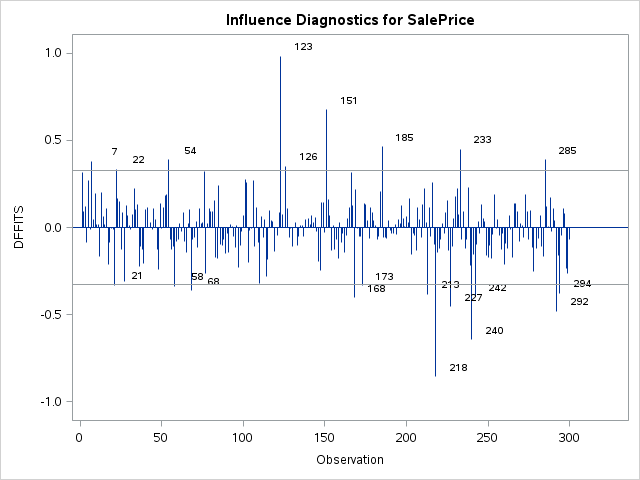
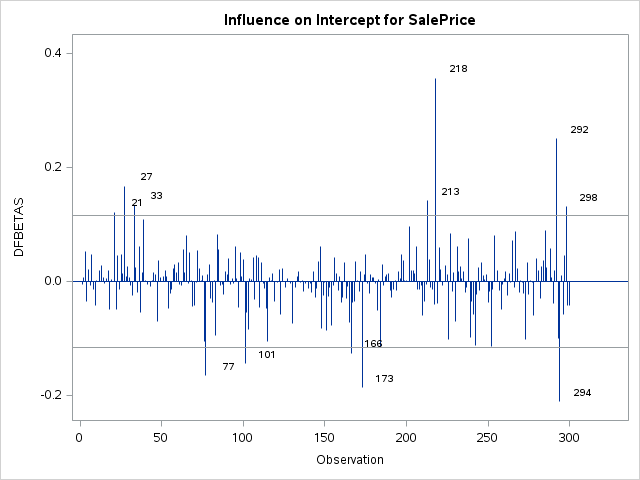
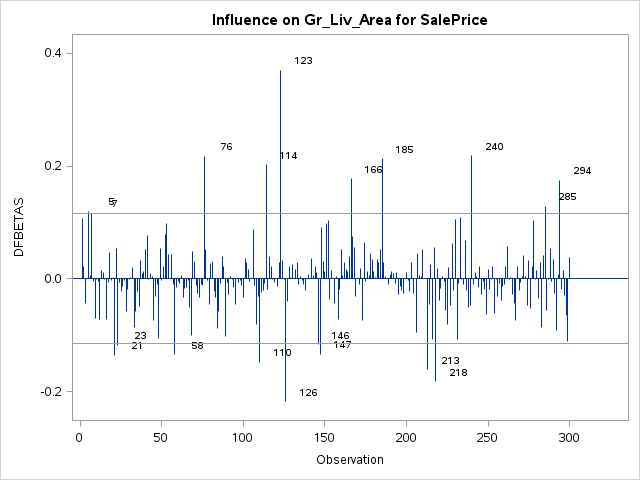
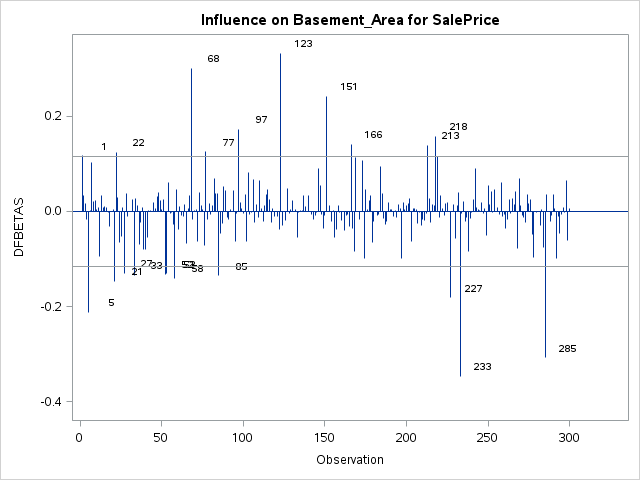
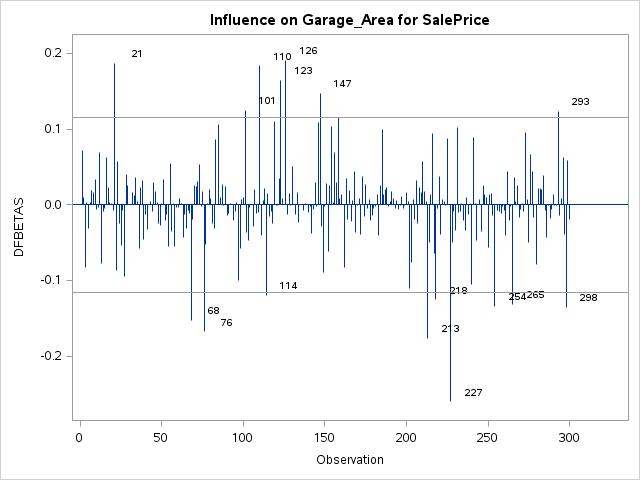
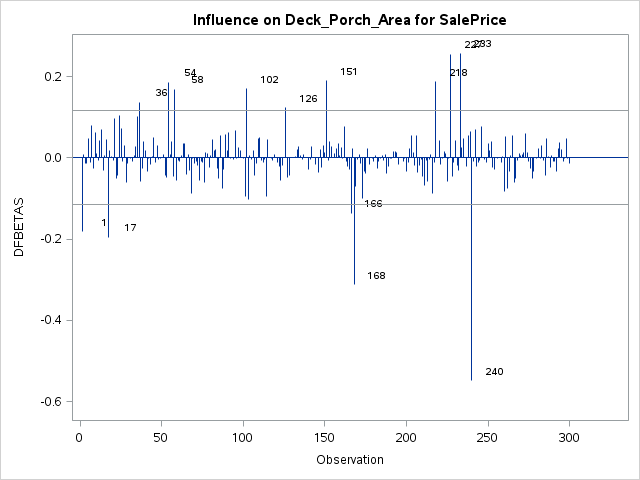
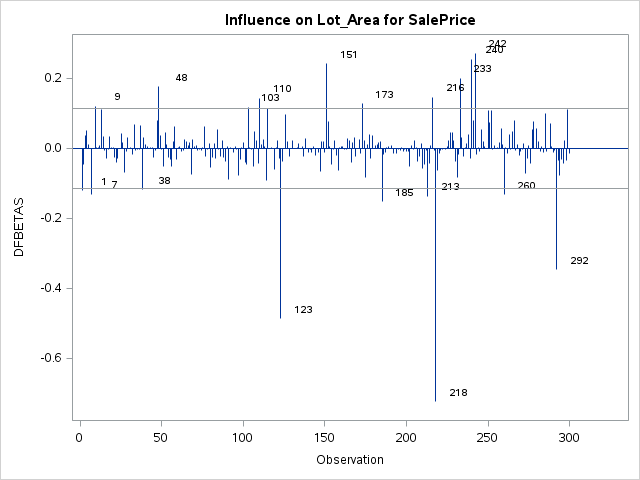
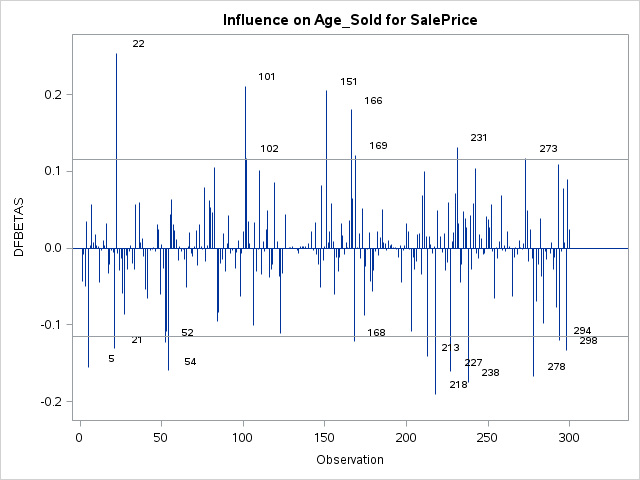
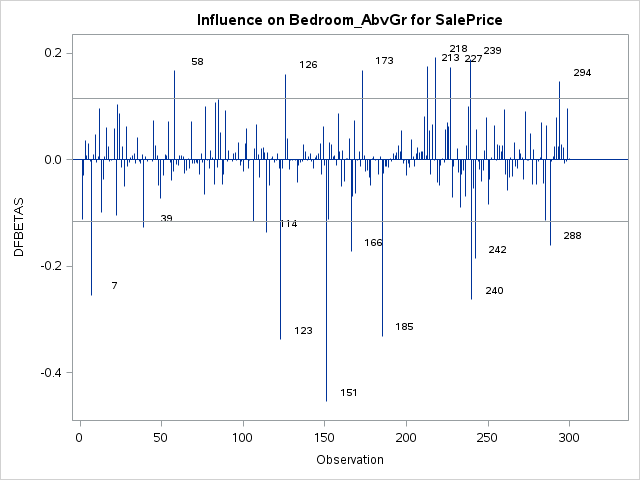

In [17]:
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
              Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom ;

ods select none;
proc glmselect data=statdata.ameshousing3 plots=all;
   STEPWISE: model SalePrice = &interval / selection=stepwise
                   details=steps select=SL slentry=0.05 slstay=0.05;
   title "Stepwise Model Selection for SalePrice - SL 0.05";
run;
quit;
ods select all;

ods graphics on;
ods output RSTUDENTBYPREDICTED=Rstud 
           COOKSDPLOT=Cook
           DFFITSPLOT=Dffits 
           DFBETASPANEL=Dfbs;
proc reg data=statdata.ameshousing3 
         plots(unpack only label)=
              (RSTUDENTBYPREDICTED 
               COOKSD 
               DFFITS 
               DFBETAS);
   SigLimit: model SalePrice = &_GLSIND; /**/
   title 'SigLimit Model - Plots of Diagnostic Statistics';
run;
quit;

Now let’s look at the Dffits data set. We see DFFITS influence statistics in the DFFITS column. But notice that for some observations like 7, 21, and 22 there are missing values in the DFFITS column. For observations that are flagged as influential by DFFITS, the statistics are in the DFFITSOUT column rather than the DFFITS column. Because the DFFITS values are not all in the same column, if we want to change the cutoff or ask questions about the DFFITS values we’ll have to do a little extra work.

Go back to the DFBETAS panel plot. Here we see the order of the variables in the _GLSIND macro: above grade living area, basement area, garage area, deck/porch area, lot area, age sold, and bedroom above grade. So in the Dfbs data set, _DFBETAS1 and _DFBETASOUT1 are for the intercept, _DFBETAS2 and _DFBETASOUT2 are for above grade living area, _DFBETAS3 and _DFBETASOUT3 are for basement area, and so forth, ending with _DFBETAS8 and _DFBETASOUT8 for the last predictor variable, bedroom above grade. 



In [18]:
 /* Before running the code below,*/
 /* run the code from the previous demo, 
 /* Looking for Influential Observations, Part 1.*/
 /* Run both programs in the same SAS session.*/

title;

/*Check outLevlabel column*/
proc print data=Rstud noobs;
run;
/*Check CooksDLabel column*/
proc print data=Cook noobs;
run;
/*Check DFFITSOUT column*/
proc print data=Dffits noobs;
run;

In [19]:
/*Check rows and column*/
proc print data=Dfbs;
run;

First, we’ll use a DATA step to create a data set named Dfbs01 from the first 300 observations of the Dfbs data set. In the next DATA step, we’ll create a data set named Dfbs02 starting with observation 301. Then we’ll combine the two new data sets by using this UPDATE statement in a DATA step, combining by observation. Let’s run these three DATA steps and take a look at the new data sets in the temporary Work library.


In [20]:
data Dfbs01;
   set Dfbs (obs=300);
run;

data Dfbs02;
   set Dfbs (firstobs=301);
run;

data Dfbs2;
   update Dfbs01 Dfbs02;
   by Observation;
run;

In [21]:

proc print data = Dfbs2;
run;

proc sql number;
create table Dfbs3 as
select o.Model, o.Dependent, o.Observation, 
o._DFBETAS1, o._DFBETASOUT1,	
o._DFBETAS2, o._DFBETASOUT2, o._DFBETAS3, o._DFBETASOUT3, o._DFBETAS4, o._DFBETASOUT4 ,	
o._DFBETAS5, o._DFBETASOUT5, o._DFBETAS6, o._DFBETASOUT6,
t._DFBETAS7, t._DFBETASOUT7, t._DFBETAS8, t._DFBETASOUT8
from Dfbs01 as o inner join Dfbs02 as t
on o.observation = t.observation;
select* from Dfbs3;
run;

In [22]:
data influential;
/*  Merge data sets from above.*/
    merge Rstud
          Cook 
          Dffits
          Dfbs2;
    by observation;

/*  Flag observations that have exceeded at least one cutpoint;*/
   if (ABS(Rstudent)>3) or (Cooksdlabel ne ' ') or Dffitsout then flag=1;
   array dfbetas{*} _dfbetasout: ;
   do i=2 to dim(dfbetas);
      if dfbetas{i} then flag=1;
   end;

/*  Set to missing values of influence statistics for those*/
/*  that have not exceeded cutpoints;*/
   if ABS(Rstudent)<=3 then RStudent=.;
   if Cooksdlabel eq ' ' then CooksD=.;

/*  Subset only observations that have been flagged.*/
   if flag=1;
   drop i flag;
run;

title;
proc print data=influential;
   id observation;
   var Rstudent CooksD Dffitsout _dfbetasout:; 
run;

In [23]:
title "Displaying Influential Observations";
proc reg data=exercise plots(only) = (cooksd(label)
rstudentbypredicted(label));
id Subj;
model Pushups = Rest_Pulse / influence r;
run;
quit;


In [24]:
ods graphics on;
title "Detecting Influential Observations in Multiple Regression";
proc reg data=exercise 
    plots(label only) = (cooksd
    rstudentbypredicted
    dffits
    dfbetas);
id Subj;
model Pushups = Age Max_Pulse Run_Pulse / influence;
run;
quit;
ods graphics off;

## Creating Dummy Variables 

In [25]:
data Dummy;
    set Store;
    *Create dummy variable for Gender;
        if Gender = 'Male' then Male = 1;
        else if Gender = 'Female' then Male = 0;
    *Create Dummy Variable for Region;
        if Region not in ('North' 'East' 'South' 'West') then
            call missing(North, East, South);
            else if Region = 'North' then North = 1;
        else North = 0;
        if Region = 'East' then East = 1;
            else East = 0;
        if Region = 'South' then South = 1;
            else South = 0;
run;

title "Creating and Using Dummy variables";
proc print data=Dummy(obs=10) noobs;
    var Region Gender Male North East South;
run

In [26]:
title "Running a Multiple Regression with Dummy Variables";
proc reg data=Dummy;
model Music_Sales = Total_Sales Male North East South;
run;
quit;

## Detecting Collinearity via Variance Inflation Factor
(pay attention when VIF is between 5 and 10)

In [27]:
title "Using the VIF to Detect Collinearity";
proc reg data=exercise;
    model Pushups = Age Rest_Pulse Max_Pulse Run_Pulse / VIF;
run;
quit;

In the PLOTS= option, the global plot option ONLY suppresses the default plots. QQ requests a residual quantile-quantile plot to assess the normality of the residual error, and RESIDUALBYPREDICTED requests a plot of residuals by predicted values. RESIDUALS requests a panel of plots of residuals by the predictor variables in the model.


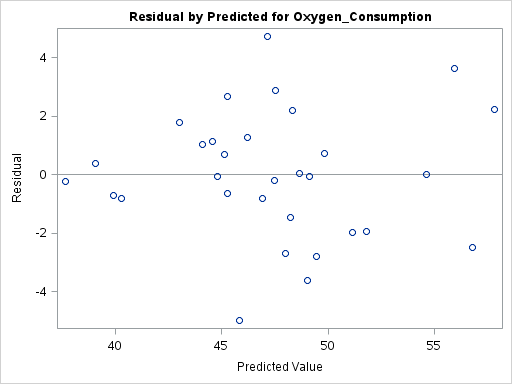
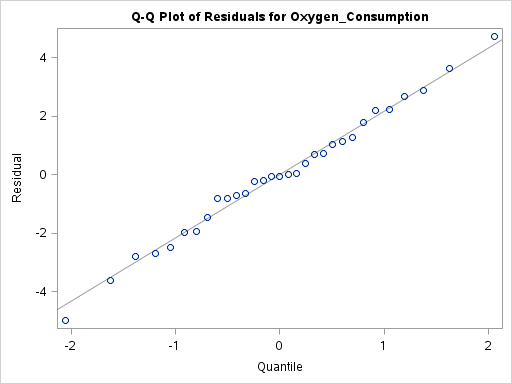
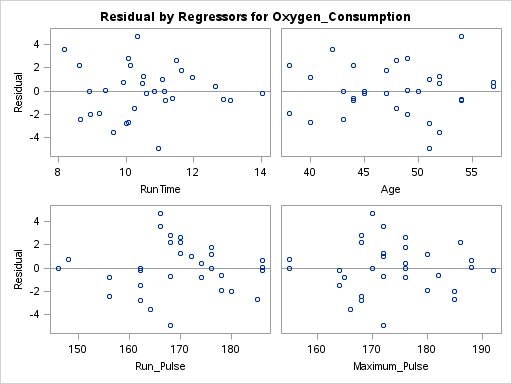

In [28]:
ods graphics / imagemap=on width=800;

proc reg data=statdata.fitness
         plots(only)=(QQ RESIDUALBYPREDICTED RESIDUALS); 
   PREDICT: model Oxygen_Consumption =
                  RunTime Age Run_Pulse Maximum_Pulse; 
   id Name; 
   title 'PREDICT Model - Plots of Diagnostic Statistics';
run;
quit;

title;

#### Code for SAS Statistic by example

In [29]:
*variables

Region
Advertising
Gender
Book_Sales
Music_Sales
Electronics_Sales
Total_Sales
;

proc format;
   value yesno 1 = 'Yes'
               0 = 'No';
data Store;
   length Region $ 5;
   call streaminit(57676);
   do Transaction = 1 to 200;
      R = ceil(rand('uniform')*10);
      select(R);
         when(1) Region = 'East';
         when(2) Region = 'West';
         when(3) Region = 'North';
         when(4) Region = 'South';
         otherwise;
      end;
      Advertising = rand('bernouli',.6);
      if rand('uniform') lt .6 then Gender = 'Female';
         else Gender = 'Male';
      Book_Sales = abs(round(rand('normal',250,50) + 30*(Gender = 'Female')
                    + 30*Advertising,10)) ;
      Music_Sales = abs(round(rand('uniform')*40 + rand('normal',50,5)
         + 30*(Region = 'East' and Gender = 'Male')
         - 20*(Region = 'West' and Gender = 'Female'),5) + 10*Advertising);
      Electronics_Sales = abs(round(rand('normal',300,60) + 70*(Gender = 'Male')
       + 55*Advertising + 50*(Region = 'East') - 20*(Region = 'South') 
       + 75*(Region = 'West'),10));
      Total_Sales = sum(Book_Sales,Music_Sales,Electronics_Sales);
   output;
   end;
   drop R;
   format Book_Sales Music_Sales Electronics_Sales Total_Sales dollar9.
          Advertising yesno.;
run;
 
/*title "Listing of Store";*/
/*proc print data=store heading=h;*/
/*run;*/

/*proc univariate data=store;*/
/*   var Book_Sales -- Total_Sales;*/
/*   histogram;*/
/*run;*/
/**/
/*title "Scatter Matrix for Store Variables";*/
/*proc sgscatter data=store;*/
/*   matrix Book_Sales -- Total_Sales / group = Gender;*/
/*run;*/
/**/
/*proc sgplot data=store;*/
/*   scatter x=Book_Sales y=Total_Sales / group=Gender;*/
/*run;*/

proc rank data=store out=median_sales groups=2;
   var Total_Sales;
   ranks Sales_Group;
run;

proc format;
   value sales 0 = 'Low'
               1 = 'High';
run;

/*proc logistic data=median_sales order=formatted;*/
/*   class Gender(param=ref ref='Male');*/
/*   model Sales_Group = Gender;*/
/*   format Sales_Group sales.;*/
/*quit;*/
/**/
/*proc logistic data=median_sales order=formatted;*/
/*   class Gender(param=ref ref='Male')*/
/*         Advertising (param=ref ref='No');*/
/*   model Sales_Group = Gender Advertising;*/
/*   format Sales_Group sales.;*/
/*quit;*/

*Create test data set;
libname example 'c:\books\statistics by example';
data example.Blood_Pressure;
   call streaminit(37373);
   do Drug = 'Placebo','Drug A','Drug B';
      do i = 1 to 20;
         Subj + 1;
         if mod(Subj,2) then Gender = 'M';
         else Gender = 'F';
         SBP = rand('normal',130,10) +
               7*(Drug eq 'Placebo') - 6*(Drug eq 'Drug B');
         SBP = round(SBP,2);
         DBP = rand('normal',80,5) +
               3*(Drug eq 'Placebo') - 2*(Drug eq 'Drug B');
         DBP = round(DBP,2);
         if Subj in (5,15,25,55) then call missing(SBP, DBP);
         if Subj in (4,18) then call missing(Gender);
         output;
      end;
   end;
   drop i;
run;

/*title "Listing of the first 25 observations from Blood_Pressure";*/
/*proc print data=example.Blood_Pressure(obs=25) noobs;*/
/*   var Subj Drug SBP DBP;*/
/*run;*/

data exercise;
   call streaminit(7657657);
   do Subj = 1 to 50;
      Age = round(rand('normal',50,15));
      Pushups = abs(int(rand('normal',40,10) - .30*age));
      Rest_Pulse = round(rand('normal',50,8) + .35*age);
      Max_Pulse = round(rest_pulse + rand('normal',50,5) - .05*age);
      Run_Pulse = round(max_pulse - rand('normal',3,3));
      output;
   end;
run;

*Data set for a paired t-test example;
data reading;
   input Subj Before After @@;
datalines;
1 100 110  2 120 121  3 130 140  4 90 110  5 85 92
6 133 137  7 210 209  8 155 179
;

/*title "Listing of Data Set READING";*/
/*proc print data=reading noobs;*/
/*run;*/

*Data set that violates assumptions for a t-test;
data salary;
   call streaminit(57575);
   do Subj = 1 to 50;
      do Gender = 'M','F';
         Income = round(20000*rand('exponential') + rand('uniform')*7000*(Gender = 'M'));
         output;
      end;
   end;
run;
/*proc univariate data=salary;*/
/*   class Gender;*/
/*   id Subj;*/
/*   var Income;*/
/*   histogram Income;*/
/*run;*/

*Data set risk for logistic regression example;
proc format;
   value yesno 1 = 'Yes'
               0 = 'No';
run;

data Risk;
   call streaminit(13579);
   length Age_Group $ 7;
   do i = 1 to 250;
      do Gender = 'F','M';
         Age = round(rand('uniform')*30 + 50);
         if missing(Age) then Age_Group = ' ';
         else if Age lt 60 then Age_Group = '1:< 60';
         else if Age le 70 then Age_Group = '2:60-70';
         else Age_Group = '3:71+';
         Chol = rand('normal',200,30) + rand('uniform')*8*(Gender='M');
         Chol = round(Chol);
         Score = .3*chol + age + 8*(Gender eq 'M');
         Heart_Attack = (Score gt 130)*(rand('uniform') lt .2);
         output;
       end;
   end;
   keep Gender Age Age_Group chol Heart_Attack;
   format Heart_Attack yesno.;
run;

/*title "Listing of first 100 observations from RISK";*/
/*proc print data=risk(obs=100);*/
/*run;*/